### 시작하는 말
**모두의 데이터분석 with 파이썬**의 첫째마당부터 넷째마당까지의 코드를 판다스로 구현한 코드이며 코랩 환경에서 작성되었습니다.  
해당 코드에서 사용한 데이터는 아래 주소를 통해 받을 수 있습니다.  
https://www.gilbut.co.kr/book/view?bookcode=BN002416#bookData  
또한 여기에서 다룰 모든 기법들은 외울 필요가 전혀 없습니다.  
여러분들이 기존에 공부하셨던 노드들에서 어느정도 이미 다뤄본 데다가 사용해야할 경우에만 검색을 통해서 충분히 찾으실 수 있기 때문입니다.  
그냥 편하게 이런 식으로 응용할 수 있구나 하는 정도로 읽어보시면 될 것입니다.

아래 한글 폰트 적용 코드는 한 차례 설치 후 런타임 다시 시작을 해주시기 바랍니다.  
런타임 다시 시작할 때는 아래 코드를 시행하실 필요는 없습니다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 그리기 전 바로 아래 주석처리된 코드를 붙여넣어주세요.
# plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


본 노트북에서 사용할 도구들입니다.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

코랩 환경에서는 아래 코드를 실행시켜 동봉된 파일들을 불러올 수 있습니다.

In [ ]:
# from google.colab import files
# files.upload()

# **첫째마당 기온 공공 데이터**

### **Unit 2. 서울의 기온 데이터 분석하기**  
Unit 2의 데이터 불러오기는 아래와 같은 단순한 코드를 통해 구현할 수 있습니다.

In [ ]:
data_unit2 = pd.read_csv('seoul.csv', encoding = 'cp949')
data_unit2

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
40216,2019-01-13,108,1.2,-3.0,7.6
40217,2019-01-14,108,1.4,-2.4,5.3
40218,2019-01-15,108,-1.7,-7.2,2.6
40219,2019-01-16,108,-5.2,-10.1,-1.1


### **Unit 3. 서울이 가장 더웠던 날은 언제였을까**

판다스에서 결측치를 확인하는 것은 여러가지 방법이 있습니다. 여기에선 두가지만 소개하겠습니다.

In [ ]:
data_unit2.isnull().values.any()
# True가 이 데이터에 결측치가 있다는 의미입니다.

True

위 코드를 각각 쪼개서 소개하겠습니다.  
isnull() 함수는 데이터프레임 각 칸 안에 데이터가 **있으면 False, 없으면 True**로 바꿔줍니다.  
데이터만 변환해주기 때문에 여전히 데이터프레임 구조를 유지하고 있습니다.

In [ ]:
print(data_unit2.isnull())
print('')
print(type(data_unit2.isnull()))

          날짜     지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
0      False  False    False    False    False
1      False  False    False    False    False
2      False  False    False    False    False
3      False  False    False    False    False
4      False  False    False    False    False
...      ...    ...      ...      ...      ...
40216  False  False    False    False    False
40217  False  False    False    False    False
40218  False  False    False    False    False
40219  False  False    False    False    False
40220  False  False    False    False    False

[40221 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>


values는 데이터를 ndarray 형태로 바꿔줍니다.  
ndarray는 numpy에서 제공하는 아주 효율적인 배열 오브젝트로 한가지 타입의 데이터만을 담을 수 있습니다.

In [ ]:
print(data_unit2.values)
print('')
print(type(data_unit2.values))
print('')
print(data_unit2.values.shape)
print('')
# 위에서 말한 것처럼 한가지 데이터 타입만을 담을 수있기에 object + int 데이터면 objcet 데이터로 저장됩니다.
print(data_unit2.values.dtype)
print('')
# 앞의 isnull() 함수와 합치면 다음과 같은 결과가 나타납니다.
print(data_unit2.isnull().values)

[['1907-10-01' 108 13.5 7.9 20.7]
 ['1907-10-02' 108 16.2 7.9 22.0]
 ['1907-10-03' 108 16.2 13.1 21.3]
 ...
 ['2019-01-15' 108 -1.7 -7.2 2.6]
 ['2019-01-16' 108 -5.2 -10.1 -1.1]
 ['2019-01-17' 108 -0.3 -3.2 4.0]]

<class 'numpy.ndarray'>

(40221, 5)

object

[[False False False False False]
 [False False False False False]
 [False False False False False]
 ...
 [False False False False False]
 [False False False False False]
 [False False False False False]]


any() 함수는 전달받은 인자 중 하나라도 True면 True를 반환합니다.  
data_unit2.isnull().values 의 결과와 합쳐지면 아래와 같이 나타나게 됩니다.

In [ ]:
print(data_unit2.isnull().any())
print('')
print(data_unit2.isnull().values.any())

날짜         False
지점         False
평균기온(℃)     True
최저기온(℃)     True
최고기온(℃)     True
dtype: bool

True


판다스에 대해서 조금 더 깊게 이해해 보겠습니다.  
만일 데이터프레임의 한 열에 대해서만 isnull()과 같은 함수를 적용하면 데이터프레임이 아닌 인덱스를 가진 시리즈 데이터로 반환합니다.

In [ ]:
print(data_unit2['최고기온(℃)'].isnull())
print('')
print(type(data_unit2['최고기온(℃)'].isnull()))

0        False
1        False
2        False
3        False
4        False
         ...  
40216    False
40217    False
40218    False
40219    False
40220    False
Name: 최고기온(℃), Length: 40221, dtype: bool

<class 'pandas.core.series.Series'>


위에서 isnull() 함수를 통해 인덱스와 각각의 인덱스에 대해 True / False 값이 주어진 시리즈를 데이터프레임에 전달해주면 인덱스가 True 값만을 표시합니다.  
즉, isnull()을 통해 빈 칸이 True가 되고 데이터프레임은 True 값이 있는(빈 칸이 있는) 인덱스만을 뽑아내게 됩니다.

In [ ]:
data_unit2[data_unit2['최고기온(℃)'].isnull()]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
15676,1950-09-01,108,NaN,NaN,NaN
15677,1950-09-02,108,NaN,NaN,NaN
15678,1950-09-03,108,NaN,NaN,NaN
15679,1950-09-04,108,NaN,NaN,NaN
15680,1950-09-05,108,NaN,NaN,NaN
...,...,...,...,...,...
16429,1953-11-28,108,NaN,NaN,NaN
16430,1953-11-29,108,NaN,NaN,NaN
16431,1953-11-30,108,NaN,NaN,NaN
21260,1967-02-19,108,-1.7,NaN,NaN


혹은 다음과 같이 간단하게 통계로 확인 할 수 있습니다. RangeIndex, 데이터의 총 갯수와 Non-Null 데이터 갯수를 비교해보세요.

In [ ]:
data_unit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40221 entries, 0 to 40220
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       40221 non-null  object 
 1   지점       40221 non-null  int64  
 2   평균기온(℃)  39465 non-null  float64
 3   최저기온(℃)  39464 non-null  float64
 4   최고기온(℃)  39463 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB


### 문제 풀이
서울의 날씨가 가장 높았던 날의 날짜와 기온 구하기

주어진 데이터에서 가장 높은 값을 구하는 것은 아래 코드 한 줄이면 충분합니다.  
max 함수는 default 값으로 axis = 0이 주어져 각 열별 데이터에서 최대값을 반환합니다.  
axis = 1일 경우 각 행별로 최대값을 반환합니다.

In [ ]:
print(data_unit2.max(axis=0))
print('')
print(data_unit2.max(axis=1))
print('')
print(data_unit2['최고기온(℃)'].max())

날짜         2019-01-17
지점                108
평균기온(℃)          33.7
최저기온(℃)          30.3
최고기온(℃)          39.6
dtype: object

0        108.0
1        108.0
2        108.0
3        108.0
4        108.0
         ...  
40216    108.0
40217    108.0
40218    108.0
40219    108.0
40220    108.0
Length: 40221, dtype: float64

39.6


문제 풀이 역시 간단합니다.  
위에서 찾은 최대 기온을 만족하는 인덱스를 찾고 날짜 데이터를 뽑아내면 끝입니다.

In [ ]:
# 아래 코드를 통해 데이터가 특정 값을 갖는 인덱스를 추출할 수 있습니다.
print(data_unit2['최고기온(℃)'] == data_unit2['최고기온(℃)'].max())
print('')

# 위에서 Nan 값을 가진 행을 뽑아낸 것과 같이 조건을 만족하는 행을 출력해보겠습니다.
print(data_unit2[data_unit2['최고기온(℃)'] == data_unit2['최고기온(℃)'].max()])
print('')

# 위에서 찾아낸 행에서 특정 열, 날짜 컬럼을 지정해 날짜 데이터만을 추출하겠습니다.
print(data_unit2['날짜'][data_unit2['최고기온(℃)'] == data_unit2['최고기온(℃)'].max()])

0        False
1        False
2        False
3        False
4        False
         ...  
40216    False
40217    False
40218    False
40219    False
40220    False
Name: 최고기온(℃), Length: 40221, dtype: bool

               날짜   지점  평균기온(℃)  최저기온(℃)  최고기온(℃)
40051  2018-08-01  108     33.6     27.8     39.6

40051    2018-08-01
Name: 날짜, dtype: object


# **둘쨰마당 데이터 시각화 기초**

### **Unit 4. 데이터 기본 그래프 그리기**

다른 형식의 데이터를 판다스 데이터로 변환하는 것은 대부분의 경우 아래와 같이 pd.DataFrame()를 씌워주는 것으로도 충분합니다.  
별도로 지정하지 않았지만 list의 index에 맞추어 첫 시작 index(x축)가 0, 최종 index(x축)가 3이 된 것을 확인할 수 있습니다.

<function matplotlib.pyplot.show>

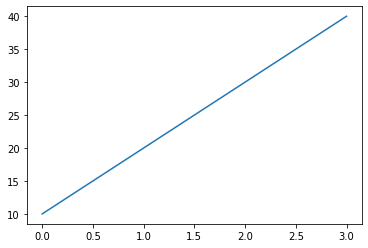

In [ ]:
temp_data_1 = pd.DataFrame([10, 20, 30, 40])
plt.plot(temp_data_1)
plt.show

위에서 생성한 temp_data_1을 데이터프레임 표로 확인해 보겠습니다.  
방금 전 말한 것과 같이 index가 0부터 시작하는 것을 확인할 수 있습니다.  
컬럼명 역시 0부터 시작하는 것을 확인할 수 있습니다.

In [ ]:
temp_data_1

,0
0,10
1,20
2,30
3,40


데이터 프레임의 인덱스는 reset_index 함수와 set_index 함수 두가지를 통해 쉽게 변경할 수 있습니다.  
하지만 여기에선 간단하게 1부터 시작하게 하는 트릭을 먼저 소개하겠습니다.

In [ ]:
# index를 호출하게 되면 해당 데이터 프레임의 index가 array로 뽑아져 나오며 이를 다시 선언하거나 아래와 같이 수정해줄 수 있습니다.
print(temp_data_1.index)

# 아래 if문은 본 쉘을 여러번 돌려도 index가 1, 2, 3... 지속적으로 커지는 것을 방지하기 위해 걸어두었습니다.
if temp_data_1.index.start == 0:
    temp_data_1.index += 1
print(temp_data_1.index)

RangeIndex(start=0, stop=4, step=1)
RangeIndex(start=1, stop=5, step=1)


In [ ]:
# 아래와 같이 index가 1부터 시작하는 것을 확인할 수 있습니다.
temp_data_1

,0
1,10
2,20
3,30
4,40


이번엔 인덱스 명을 직접 선택해주겠습니다.  
컬럼명 역시 유사한 방법으로 수정할 수 있습니다.

In [ ]:
temp_data_1.index = ['A', 'B', 'C', 'D']

# 아래 코드는 컬럼명을 변경하는 코드입니다.
temp_data_1.columns = ['asc']
temp_data_1

,asc
A,10
B,20
C,30
D,40


처음에 그렸던 그래프와 아래의 그래프의 x축이 어떻게 변했는지 확인해 주세요.

<function matplotlib.pyplot.show>

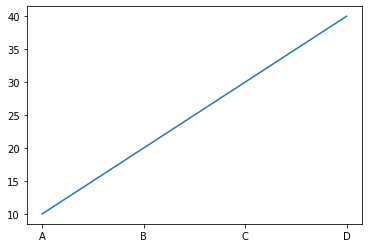

In [ ]:
plt.plot(temp_data_1)
plt.show

아래와 같이 데이터프레임 생성하면서 선언을 해줄 수도 있습니다.  
단, list 형태로 입력해주어야합니다.

In [ ]:
temp_data_2 = pd.DataFrame([40, 30, 20, 10], index = range(1, 5), columns = ['decs'])
temp_data_2

,decs
1,40
2,30
3,20
4,10


이번엔 set_index 함수에 대해서 알아보겠습니다.  
데이터 프레임의 한 열을 인덱스로 삼는 set_index를 보여드리겠습니다.  
날짜, 출석번호 등 열에 포함된 데이터면서 동시에 인덱스의 역할을 하는 데이터가 있을 경우 해당 함수를 통해 해당 열을 인덱스로 삼을 수 있습니다.

In [ ]:
temp_data_3 = pd.DataFrame([[1, 10], [2, 20], [3, 30], [4, 40]], columns = ['index', 'data'])
temp_data_3 

,index,data
0,1,10
1,2,20
2,3,30
3,4,40


아래와 같이 컬럼명만 선택해서 간단히 생성할 수 있습니다.

In [ ]:
temp_data_3 = temp_data_3.set_index('index')
temp_data_3

,data
index,
1,10
2,20
3,30
4,40


pandas와 plt의 조합은 하나하나 지정하지 않아도 똑똑하게 맞춰주지만 아래와 같은 오류가 발생하기도 합니다.



<function matplotlib.pyplot.show>

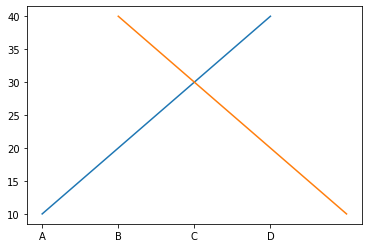

In [ ]:
plt.figure()
plt.plot(temp_data_1)
plt.plot(temp_data_2)
plt.show

이것은 인덱스가 서로 맞지 않아 발생한 문제로 temp_data_1과 temp_data_2의 인덱스를 맞추어 주겠습니다.



<function matplotlib.pyplot.show>

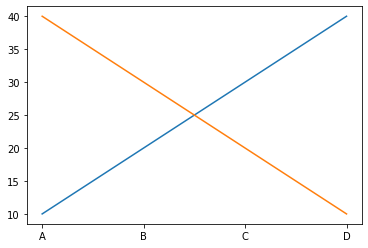

In [ ]:
temp_data_2.index = ['A', 'B', 'C', 'D']
plt.figure()
plt.plot(temp_data_1)
plt.plot(temp_data_2)
plt.show

데이터가 index에 들어가있으면 계산, 통계 등 데이터로서 다루기 어려운 점이 있습니다. 이 경우 reset_index() 함수를 통해 인덱스를 열 데이터로 뽑아올 수 있습니다.

In [ ]:
temp_data_3.reset_index()

,index,data
0,1,10
1,2,20
2,3,30
3,4,40


### **Unit 5. 내 생일의 기온 변화를 그래프로 그리기**

이번 unit에서는 데이터 분석에 조금 더 초점을 맞춰보겠습니다.

In [ ]:
# 데이터를 불러옵니다.
data_unit2 = pd.read_csv('seoul.csv', encoding = 'cp949')
data_unit2

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
40216,2019-01-13,108,1.2,-3.0,7.6
40217,2019-01-14,108,1.4,-2.4,5.3
40218,2019-01-15,108,-1.7,-7.2,2.6
40219,2019-01-16,108,-5.2,-10.1,-1.1


info() 함수는 몇개의 데이터가 있고 데이터 타입은 어떤지 등 데이터프레임의 통계자료를 보여줍니다.  
아래 날짜 열의 데이터 타입을 주목해주세요.

In [ ]:
data_unit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40221 entries, 0 to 40220
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   날짜       40221 non-null  object 
 1   지점       40221 non-null  int64  
 2   평균기온(℃)  39465 non-null  float64
 3   최저기온(℃)  39464 non-null  float64
 4   최고기온(℃)  39463 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.5+ MB


아래 코드는 '날짜' 열의 데이터를 Datetime 데이터로 변환해주는 함수입니다.  
일반 숫자 데이터와 다르게 날짜는 1~12, 1~28, 29, 30, 31 등 일괄적으로 처리하기 까다로운 면이 있습니다.  
Datetime 데이터는 날짜 데이터를 손쉽게 다룰 수 있도록 도와줍니다.

In [ ]:
data_unit2['날짜'] = pd.to_datetime(data_unit2['날짜'])
data_unit2

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
0,1907-10-01,108,13.5,7.9,20.7
1,1907-10-02,108,16.2,7.9,22.0
2,1907-10-03,108,16.2,13.1,21.3
3,1907-10-04,108,16.5,11.2,22.0
4,1907-10-05,108,17.6,10.9,25.4
...,...,...,...,...,...
40216,2019-01-13,108,1.2,-3.0,7.6
40217,2019-01-14,108,1.4,-2.4,5.3
40218,2019-01-15,108,-1.7,-7.2,2.6
40219,2019-01-16,108,-5.2,-10.1,-1.1


아래와 같이 datetime 데이터로 변환된 것을 확인할 수 있습니다.

In [ ]:
data_unit2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40221 entries, 0 to 40220
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   날짜       40221 non-null  datetime64[ns]
 1   지점       40221 non-null  int64         
 2   평균기온(℃)  39465 non-null  float64       
 3   최저기온(℃)  39464 non-null  float64       
 4   최고기온(℃)  39463 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 1.5 MB


DateTime 데이터는 다음과 같이 연 / 월 / 일을 추출할 수 있습니다.  
인덱스 역시 함께 추출된 것을 확인하실 수 있을 겁니다.  
이후 다음의 성질을 이용해 특정 날짜 데이터만 추출해 보겠습니다.

In [ ]:
# dt(datetime) 요소의 year 요소를 출력
print(data_unit2['날짜'].dt.year.head())
print('')

# dt(datetime) 요소의 month 요소를 출력
print(data_unit2['날짜'].dt.month.head())
print('')

# dt(datetime) 요소의 day 요소를 출력
print(data_unit2['날짜'].dt.day.head())

0    1907
1    1907
2    1907
3    1907
4    1907
Name: 날짜, dtype: int64

0    10
1    10
2    10
3    10
4    10
Name: 날짜, dtype: int64

0    1
1    2
2    3
3    4
4    5
Name: 날짜, dtype: int64


### 문제풀이

위에서 배운 내용을 응용해 12월 데이터만 뽑아보겠습니다.

In [ ]:
data_unit2[data_unit2['날짜'].dt.month == 12]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
61,1907-12-01,108,-4.6,-10.5,1.4
62,1907-12-02,108,-3.1,-9.0,3.4
63,1907-12-03,108,1.9,-2.6,6.1
64,1907-12-04,108,-1.2,-2.7,1.3
65,1907-12-05,108,-1.0,-6.9,2.6
...,...,...,...,...,...
40199,2018-12-27,108,-10.1,-12.5,-6.5
40200,2018-12-28,108,-10.5,-14.4,-6.6
40201,2018-12-29,108,-7.6,-10.5,-3.0
40202,2018-12-30,108,-6.8,-11.3,-0.9


10일 데이터만 뽑아보겠습니다.

In [ ]:
data_unit2[data_unit2['날짜'].dt.day == 10]

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
9,1907-10-10,108,14.2,6.4,24.1
40,1907-11-10,108,7.9,1.7,13.2
70,1907-12-10,108,-1.4,-5.1,4.3
101,1908-01-10,108,0.3,-4.5,3.3
132,1908-02-10,108,-7.0,-10.6,-2.5
...,...,...,...,...,...
40091,2018-09-10,108,22.9,18.6,28.4
40121,2018-10-10,108,12.0,7.9,16.7
40152,2018-11-10,108,11.9,8.8,17.1
40182,2018-12-10,108,-2.5,-8.1,4.6


그렇다면 12월 10일을 뽑으려면 어떻게 해야할까요?  
두 조건문을 모두 충족하는 데이터를 뽑기 위해선 아래와 같이 괄호()로 묶어 준 뒤 조건 부호를 통해 여러 조건을 적용할 수 있습니다.  
부호는 각각 &(and), |(or), ~(not)입니다.  
두개 이상의 조건도 가능합니다.

In [ ]:
(data_unit2['날짜'].dt.month == 12) & (data_unit2['날짜'].dt.day == 10)

0        False
1        False
2        False
3        False
4        False
         ...  
40216    False
40217    False
40218    False
40219    False
40220    False
Name: 날짜, Length: 40221, dtype: bool

이후 코드가 너무 길어지기 때문에 간결성을 위해 birth_day라는 변수에 저장하겠습니다.

In [ ]:
birth_day = data_unit2[(data_unit2['날짜'].dt.month == 12) & (data_unit2['날짜'].dt.day == 10)]
birth_day

,날짜,지점,평균기온(℃),최저기온(℃),최고기온(℃)
70,1907-12-10,108,-1.4,-5.1,4.3
436,1908-12-10,108,-0.7,-7.4,6.5
801,1909-12-10,108,-6.2,-11.1,-1.4
1166,1910-12-10,108,-11.6,-14.8,-8.2
1531,1911-12-10,108,-5.1,-9.6,0.5
...,...,...,...,...,...
38721,2014-12-10,108,1.6,-1.9,4.2
39086,2015-12-10,108,7.8,5.8,9.2
39452,2016-12-10,108,-1.6,-5.9,3.6
39817,2017-12-10,108,1.1,-2.5,6.7


판다스 데이터를 그래프로 그리기는 두가지 방법이 있습니다.  
데이터프레임명.그래프형태(변수)  
그래프형태(데이터프레임, 변수)  
먼저 데이터프레임에 함수를 붙여 그려보겠습니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


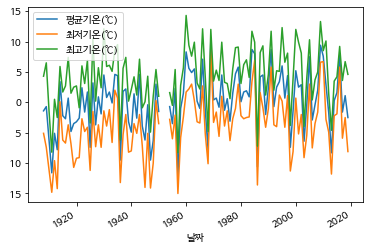

In [ ]:
plt.rc('font', family='NanumBarunGothic')
birth_day.plot(x = '날짜', y = ['평균기온(℃)', '최저기온(℃)', '최고기온(℃)'])
plt.show()

# 중간에 끊어진 것은 결측치입니다.

교재의 방식을 그대로 적용하면 다음과 같습니다.  
이 경우 label을 지정하지 않으면 등장하지 않고 또한 plt.legend()를 선언해 주어야 해당 label을 표에 등장시킬 수 있습니다.



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


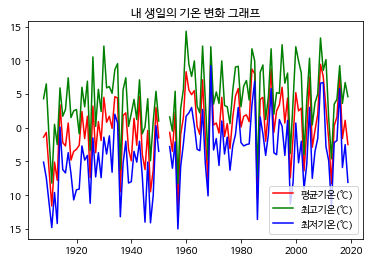

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.title('내 생일의 기온 변화 그래프')
plt.plot(birth_day['날짜'], birth_day['평균기온(℃)'], color = 'r', label = '평균기온(℃)')
plt.plot(birth_day['날짜'], birth_day['최고기온(℃)'], color = 'g', label = '최고기온(℃)')
plt.plot(birth_day['날짜'], birth_day['최저기온(℃)'], color = 'b', label = '최저기온(℃)')
plt.legend()
plt.show()

혹은, 첫번째처럼 한 번에 그려줄 수도 있습니다. y데이터에 여러 열을 동시에 선택하기 위해선 birth_day[[선택한 열]]로 묶어주여야 합니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


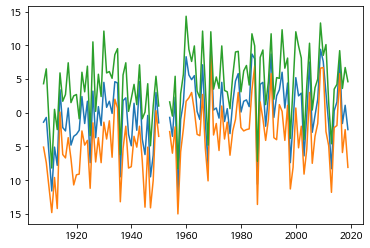

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.plot(birth_day['날짜'], birth_day[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']])
plt.show()

판다스에서 특정 열을 아래와 같이 선택해줄 수 있습니다. 아래 타입을 주의하세요.  
[[열 이름]] 특정 열을 추출해 새로운 데이터 프레임을 반환합니다.  
[열 이름] 한개의 열만 추출할 수 있으며 인덱스와 데이터가 있는 시리즈를 반환합니다.

In [ ]:
print(birth_day[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']])
print('')

print(type(birth_day[['평균기온(℃)', '최저기온(℃)', '최고기온(℃)']]))
print('')

print(birth_day['평균기온(℃)'])
print('')

print(type(birth_day['평균기온(℃)']))

       평균기온(℃)  최저기온(℃)  최고기온(℃)
70        -1.4     -5.1      4.3
436       -0.7     -7.4      6.5
801       -6.2    -11.1     -1.4
1166     -11.6    -14.8     -8.2
1531      -5.1     -9.6      0.5
...        ...      ...      ...
38721      1.6     -1.9      4.2
39086      7.8      5.8      9.2
39452     -1.6     -5.9      3.6
39817      1.1     -2.5      6.7
40182     -2.5     -8.1      4.6

[111 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>

70       -1.4
436      -0.7
801      -6.2
1166    -11.6
1531     -5.1
         ... 
38721     1.6
39086     7.8
39452    -1.6
39817     1.1
40182    -2.5
Name: 평균기온(℃), Length: 111, dtype: float64

<class 'pandas.core.series.Series'>


### **Unit 6. 기온 데이터를 다양하게 시각화하기**  
DateTime 변환 및 기타 데이터 전처리는 unit 5와 동일합니다.  
이전 unit의 내용을 참조해 주세요

8월과 12월의 최고 기온을 각각 aug와 jan 변수에 저장합니다.

In [ ]:
aug = data_unit2[data_unit2['날짜'].dt.month == 8]['최고기온(℃)']
jan = data_unit2[data_unit2['날짜'].dt.month == 1]['최고기온(℃)']

여기에선 교재를 그대로 재현하지만 경우에 따라 위에서 소개한 방식들을 통해 원하는 방법으로 그릴 수 있습니다.  
먼저 8월과 1월의 최고기온을 히스토그램으로 그리겠습니다.


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


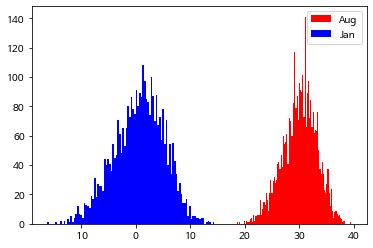

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.hist(aug, bins = 100, color = 'r', label = 'Aug')
plt.hist(jan, bins = 100, color = 'b', label = 'Jan')
plt.legend()
plt.show()

그런데 혹시 눈치 채셨나요? 방금 코드에선 unit 5와 다르게 데이터프레임에서 조건을 적용하는 순서를 바꿔서 적용해보았습니다.  
최고기온을 뽑아내고 여기에서 날짜가 8월인 것을 골라내는 것과 날짜가 8월인 것을 골라내고 그 중 최고기온 열만 고르는 것은 동일합니다.



In [ ]:
print(data_unit2['최고기온(℃)'][data_unit2['날짜'].dt.month == 8])
print('')
print(data_unit2[data_unit2['날짜'].dt.month == 8]['최고기온(℃)'])

305      29.6
306      30.7
307      32.0
308      31.5
309      32.4
         ... 
40077    24.9
40078    26.1
40079    27.4
40080    28.2
40081    30.3
Name: 최고기온(℃), Length: 3379, dtype: float64

305      29.6
306      30.7
307      32.0
308      31.5
309      32.4
         ... 
40077    24.9
40078    26.1
40079    27.4
40080    28.2
40081    30.3
Name: 최고기온(℃), Length: 3379, dtype: float64


8월의 최고기온을 박스로 그리겠습니다.  
단, plt.boxplot은 입력 데이터를 시퀀스로 받기 때문에 판다스 시리즈를 변환해주어야합니다.  
위에서 등장한 .values 명령어 한 줄이면 충분합니다.  
**결측치가 존재할 경우** 날짜 인덱스가 있던 다른 그래프와 달리 boxplot은 그려지지 않기 떄문에 결측치는 dropna() 함수를 통해 제거해 주었습니다.

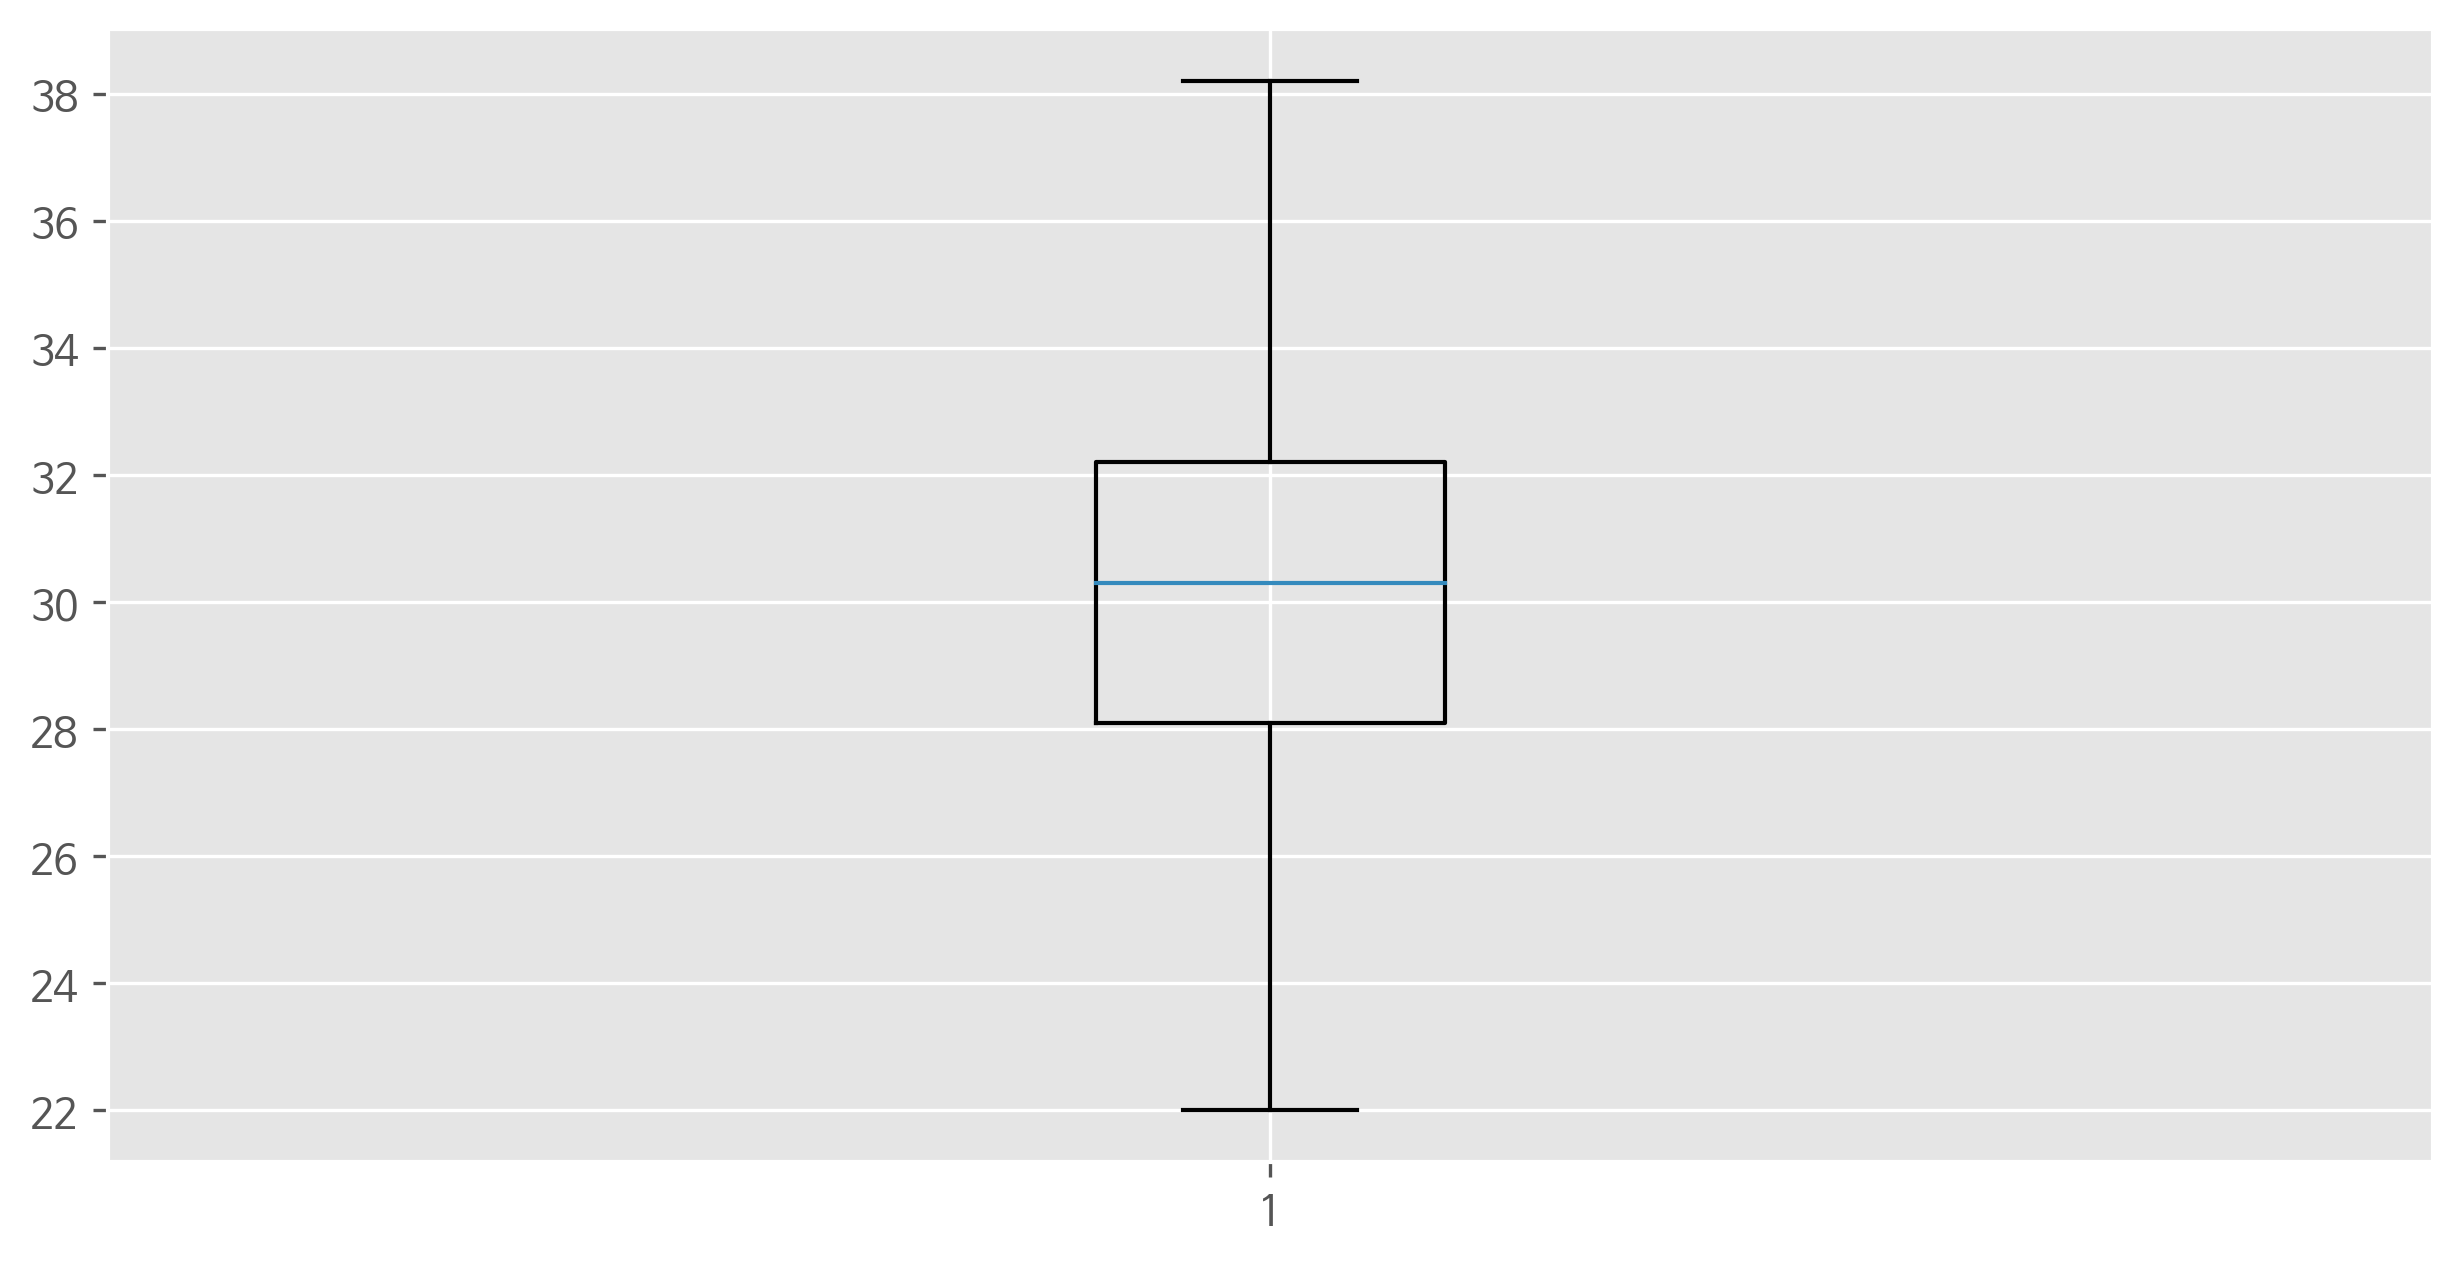

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize = (10, 5), dpi = 300)
plt.boxplot(aug.dropna().values, showfliers = False)
plt.show()

# **셋째마당 인구 공공데이터**

### **Unit 7. 우리 동네 인구 구조 시각화하기**

데이터를 불러 옵니다.  
1000단위 콤마를 처리해주기 위해 pd.read_csv 함수에 thousands 인자를 추가해 주었습니다.



In [ ]:
age_data = pd.read_csv('age.csv', encoding = 'cp949', thousands = ',')
age_data.head()

,행정구역,2019년02월_계_총인구수,2019년02월_계_연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
0,서울특별시 (1100000000),9770638,9770638,53738,59599,65815,70726,70037,69000,76377,73745,75639,70189,74217,80273,74774,71529,78329,82561,82083,90416,107254,109552,114315,122473,129497,141673,150625,156258,165662,165771,152776,151006,150177,144503,144300,145260,142644,157624,164934,...,142867,132352,135608,123861,103339,110202,83062,85623,88133,85983,86008,79560,60652,63418,59401,72043,60979,49561,47432,42445,37293,33253,29705,25250,20503,17751,14506,12100,10729,8923,7199,5374,3972,2927,2813,2260,1565,1180,880,5932
1,서울특별시 종로구 (1111000000),152880,152880,593,683,775,874,852,863,1023,904,1012,923,1004,1151,1084,1005,1099,1180,1171,1338,1528,1767,1899,2122,2193,2454,2438,2572,2682,2598,2446,2234,2206,2161,2060,1949,1888,2149,2116,...,2267,2204,2185,2014,1665,1796,1362,1387,1454,1432,1512,1369,1099,1215,1144,1424,1245,1044,1065,894,763,725,626,572,462,395,336,282,236,199,163,132,112,79,69,81,53,40,39,236
2,서울특별시 종로구 청운효자동(1111051500),13010,13010,66,79,72,98,98,94,108,109,115,95,125,142,130,105,136,124,134,151,155,147,172,143,181,188,139,163,171,186,151,137,168,157,172,160,162,193,178,...,150,138,160,131,132,124,91,103,115,106,119,118,95,103,92,125,94,87,103,83,64,67,62,47,47,31,30,12,21,14,9,8,14,6,7,9,4,2,2,16
3,서울특별시 종로구 사직동(1111053000),9584,9584,43,50,64,67,67,70,94,65,82,64,88,73,88,70,64,75,77,68,81,96,95,110,93,103,127,120,151,139,137,126,127,169,150,124,120,138,147,...,137,139,117,114,106,116,65,91,85,85,95,78,74,80,68,80,82,75,66,68,60,53,60,51,38,26,22,22,20,17,14,5,12,6,5,8,2,5,4,17
4,서울특별시 종로구 삼청동(1111054000),2820,2820,9,15,3,21,11,13,9,16,14,25,18,27,20,17,19,17,17,27,23,27,25,36,29,35,35,33,37,31,36,42,46,35,35,41,32,42,45,...,46,41,51,51,27,45,23,24,36,34,43,31,19,28,23,33,34,25,26,15,18,20,16,14,14,14,10,8,8,4,6,6,1,3,0,3,1,0,2,7


불러온 데이터프레임의 정보를 info() 함수로 확인해보겠습니다.  
오브젝트 1개를 제외하면 나머지 데이터는 전부 숫자(int64)로 이루어졌다는 것을 기억해주세요.  
직관적으로 아시겠지만 오브젝트 타입의 데이터는 '행정구역' 열임니다.

In [ ]:
age_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3841 entries, 0 to 3840
Columns: 104 entries, 행정구역 to 2019년02월_계_100세 이상
dtypes: int64(103), object(1)
memory usage: 3.0+ MB


특정 문자열을 검색하기 위해선 판다스 시리즈 데이터에 내장된 str.contains 함수를 사용할 수 있습니다.  
시리즈를 불러오기 위해선 ['컬럼명'] 데이터프레임을 불러오기 위해선 [['컬럼명']]을 사용하면 됩니다.  
우선 시리즈 데이터로 불러와 보겠습니다.

In [ ]:
print(type(age_data['행정구역']))
print('')
age_data['행정구역']

<class 'pandas.core.series.Series'>



0                서울특별시  (1100000000)
1             서울특별시 종로구 (1111000000)
2        서울특별시 종로구 청운효자동(1111051500)
3          서울특별시 종로구 사직동(1111053000)
4          서울특별시 종로구 삼청동(1111054000)
                    ...             
3836    제주특별자치도 서귀포시 서홍동(5013058000)
3837    제주특별자치도 서귀포시 대륜동(5013059000)
3838    제주특별자치도 서귀포시 대천동(5013060000)
3839    제주특별자치도 서귀포시 중문동(5013061000)
3840    제주특별자치도 서귀포시 예래동(5013062000)
Name: 행정구역, Length: 3841, dtype: object

데이터 프레임으로 불러와 보겠습니다.

In [ ]:
print(type(age_data[['행정구역']]))
print('')
age_data[['행정구역']]

<class 'pandas.core.frame.DataFrame'>



,행정구역
0,서울특별시 (1100000000)
1,서울특별시 종로구 (1111000000)
2,서울특별시 종로구 청운효자동(1111051500)
3,서울특별시 종로구 사직동(1111053000)
4,서울특별시 종로구 삼청동(1111054000)
...,...
3836,제주특별자치도 서귀포시 서홍동(5013058000)
3837,제주특별자치도 서귀포시 대륜동(5013059000)
3838,제주특별자치도 서귀포시 대천동(5013060000)
3839,제주특별자치도 서귀포시 중문동(5013061000)


### 문제풀이

판다스 시리즈 데이터를 불러오고 앞서 언급했던 내장함수를 통해 검색해보겠습니다.  
아래 코드와 같이 조건에 따라 index를 True / False 형태로 반환하고,

In [ ]:
age_data['행정구역'].str.contains('계룡시')

0       False
1       False
2       False
3       False
4       False
        ...  
3836    False
3837    False
3838    False
3839    False
3840    False
Name: 행정구역, Length: 3841, dtype: bool


True인 인덱스만 출력하면 다음과 같습니다.  
이후 코드가 너무 길어지기 때문에 해당 데이터는 city_data라는 변수에 저장해두겠습니다.

In [ ]:
city_data = age_data[age_data['행정구역'].str.contains('계룡시')]
city_data

,행정구역,2019년02월_계_총인구수,2019년02월_계_연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
2374,충청남도 계룡시 (4425000000),43484,43484,275,301,384,432,423,464,509,545,537,569,568,676,660,587,655,695,688,692,809,708,686,632,610,551,489,469,419,401,348,358,345,330,335,394,424,504,611,...,504,435,461,446,357,309,253,254,264,250,234,186,160,184,181,201,162,144,162,168,133,142,122,105,107,71,63,56,41,42,40,21,20,9,9,13,7,4,4,9
2375,충청남도 계룡시 두마면(4425031000),6959,6959,45,32,59,62,67,72,90,94,95,104,88,102,85,81,92,81,100,76,118,90,94,98,99,75,68,75,66,59,49,68,43,34,41,52,54,76,83,...,115,109,93,94,75,61,49,60,51,44,46,42,35,36,35,29,34,25,22,24,21,25,21,17,21,14,10,14,7,9,5,5,9,3,2,1,3,0,3,2
2376,충청남도 계룡시 엄사면(4425031500),19015,19015,107,123,144,144,141,137,149,176,168,177,191,235,245,226,239,270,279,288,341,307,324,311,306,302,253,265,210,185,169,147,167,161,162,160,179,168,212,...,260,200,244,209,170,159,123,125,130,139,122,90,87,97,107,125,105,96,107,100,83,79,78,69,69,40,39,36,27,28,25,16,6,4,6,9,3,3,1,5
2377,충청남도 계룡시 신도안면(4425033000),8819,8819,77,92,117,130,143,154,150,170,173,164,189,215,216,187,221,222,198,217,228,181,147,112,91,82,59,50,41,50,47,49,59,72,66,104,106,159,193,...,9,5,6,7,4,5,11,4,7,8,10,6,5,7,4,4,3,3,4,8,2,6,6,1,1,1,2,0,1,1,1,0,0,1,0,0,0,0,0,0
2378,충청남도 계룡시 금암동(4425051000),8691,8691,46,54,64,96,72,101,120,105,101,124,100,124,114,93,103,122,111,111,122,130,121,111,114,92,109,79,102,107,83,94,76,63,66,78,85,101,123,...,120,121,118,136,108,84,70,65,76,59,56,48,33,44,35,43,20,20,29,36,27,32,17,18,16,16,12,6,6,4,9,0,5,1,1,3,1,1,0,2


이번엔 위에서 조건문을 통해 뽑아낸 데이터를 그래프로 그려보겠습니다.  
아쉽게도 아래 코드를 그대로 시행 시키면 오류가 발생합니다.  
해당 오류는 문자열(오브젝트)때문에 발생한 오류로 문자열인 '행정구역' 열을 인덱스로 빼거나 혹은 이것을 제외하고 불러와야합니다.

In [ ]:
# plt.style.use('ggplot')
# plt.plot(city_data)
# plt.show()

위에서 소개했던 방식처럼 '행정구역' 열을 인덱스로 빼주도록 하겠습니다.


In [ ]:
city_data = city_data.set_index('행정구역')
city_data

,2019년02월_계_총인구수,2019년02월_계_연령구간인구수,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시 (4425000000),43484,43484,275,301,384,432,423,464,509,545,537,569,568,676,660,587,655,695,688,692,809,708,686,632,610,551,489,469,419,401,348,358,345,330,335,394,424,504,611,728,...,504,435,461,446,357,309,253,254,264,250,234,186,160,184,181,201,162,144,162,168,133,142,122,105,107,71,63,56,41,42,40,21,20,9,9,13,7,4,4,9
충청남도 계룡시 두마면(4425031000),6959,6959,45,32,59,62,67,72,90,94,95,104,88,102,85,81,92,81,100,76,118,90,94,98,99,75,68,75,66,59,49,68,43,34,41,52,54,76,83,116,...,115,109,93,94,75,61,49,60,51,44,46,42,35,36,35,29,34,25,22,24,21,25,21,17,21,14,10,14,7,9,5,5,9,3,2,1,3,0,3,2
충청남도 계룡시 엄사면(4425031500),19015,19015,107,123,144,144,141,137,149,176,168,177,191,235,245,226,239,270,279,288,341,307,324,311,306,302,253,265,210,185,169,147,167,161,162,160,179,168,212,234,...,260,200,244,209,170,159,123,125,130,139,122,90,87,97,107,125,105,96,107,100,83,79,78,69,69,40,39,36,27,28,25,16,6,4,6,9,3,3,1,5
충청남도 계룡시 신도안면(4425033000),8819,8819,77,92,117,130,143,154,150,170,173,164,189,215,216,187,221,222,198,217,228,181,147,112,91,82,59,50,41,50,47,49,59,72,66,104,106,159,193,218,...,9,5,6,7,4,5,11,4,7,8,10,6,5,7,4,4,3,3,4,8,2,6,6,1,1,1,2,0,1,1,1,0,0,1,0,0,0,0,0,0
충청남도 계룡시 금암동(4425051000),8691,8691,46,54,64,96,72,101,120,105,101,124,100,124,114,93,103,122,111,111,122,130,121,111,114,92,109,79,102,107,83,94,76,63,66,78,85,101,123,160,...,120,121,118,136,108,84,70,65,76,59,56,48,33,44,35,43,20,20,29,36,27,32,17,18,16,16,12,6,6,4,9,0,5,1,1,3,1,1,0,2


'행정구역' 이외에도 불필요한 자료가 많습니다.  
총 인구수 항목들을 제외하고 불러오도록 합니다.  
columns.difference 함수는 선택된 열이 아닌 열만을 선택합니다.  
이 과정에서 재정렬되지 않도록 sort 항목을 False로 두겠습니다.  
참고로 이 항목의 default값은 True가 아닌 None으로 True를 입력하면 오류가 발생하게 됩니다.

In [ ]:
city_data[city_data.columns.difference([' 2019년02월_계_총인구수', '2019년02월_계_연령구간인구수', '2019년02월_계_총인구수'], sort = False)]

,2019년02월_계_0세,2019년02월_계_1세,2019년02월_계_2세,2019년02월_계_3세,2019년02월_계_4세,2019년02월_계_5세,2019년02월_계_6세,2019년02월_계_7세,2019년02월_계_8세,2019년02월_계_9세,2019년02월_계_10세,2019년02월_계_11세,2019년02월_계_12세,2019년02월_계_13세,2019년02월_계_14세,2019년02월_계_15세,2019년02월_계_16세,2019년02월_계_17세,2019년02월_계_18세,2019년02월_계_19세,2019년02월_계_20세,2019년02월_계_21세,2019년02월_계_22세,2019년02월_계_23세,2019년02월_계_24세,2019년02월_계_25세,2019년02월_계_26세,2019년02월_계_27세,2019년02월_계_28세,2019년02월_계_29세,2019년02월_계_30세,2019년02월_계_31세,2019년02월_계_32세,2019년02월_계_33세,2019년02월_계_34세,2019년02월_계_35세,2019년02월_계_36세,2019년02월_계_37세,2019년02월_계_38세,2019년02월_계_39세,...,2019년02월_계_61세,2019년02월_계_62세,2019년02월_계_63세,2019년02월_계_64세,2019년02월_계_65세,2019년02월_계_66세,2019년02월_계_67세,2019년02월_계_68세,2019년02월_계_69세,2019년02월_계_70세,2019년02월_계_71세,2019년02월_계_72세,2019년02월_계_73세,2019년02월_계_74세,2019년02월_계_75세,2019년02월_계_76세,2019년02월_계_77세,2019년02월_계_78세,2019년02월_계_79세,2019년02월_계_80세,2019년02월_계_81세,2019년02월_계_82세,2019년02월_계_83세,2019년02월_계_84세,2019년02월_계_85세,2019년02월_계_86세,2019년02월_계_87세,2019년02월_계_88세,2019년02월_계_89세,2019년02월_계_90세,2019년02월_계_91세,2019년02월_계_92세,2019년02월_계_93세,2019년02월_계_94세,2019년02월_계_95세,2019년02월_계_96세,2019년02월_계_97세,2019년02월_계_98세,2019년02월_계_99세,2019년02월_계_100세 이상
행정구역,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
충청남도 계룡시 (4425000000),275,301,384,432,423,464,509,545,537,569,568,676,660,587,655,695,688,692,809,708,686,632,610,551,489,469,419,401,348,358,345,330,335,394,424,504,611,728,691,740,...,504,435,461,446,357,309,253,254,264,250,234,186,160,184,181,201,162,144,162,168,133,142,122,105,107,71,63,56,41,42,40,21,20,9,9,13,7,4,4,9
충청남도 계룡시 두마면(4425031000),45,32,59,62,67,72,90,94,95,104,88,102,85,81,92,81,100,76,118,90,94,98,99,75,68,75,66,59,49,68,43,34,41,52,54,76,83,116,109,101,...,115,109,93,94,75,61,49,60,51,44,46,42,35,36,35,29,34,25,22,24,21,25,21,17,21,14,10,14,7,9,5,5,9,3,2,1,3,0,3,2
충청남도 계룡시 엄사면(4425031500),107,123,144,144,141,137,149,176,168,177,191,235,245,226,239,270,279,288,341,307,324,311,306,302,253,265,210,185,169,147,167,161,162,160,179,168,212,234,222,262,...,260,200,244,209,170,159,123,125,130,139,122,90,87,97,107,125,105,96,107,100,83,79,78,69,69,40,39,36,27,28,25,16,6,4,6,9,3,3,1,5
충청남도 계룡시 신도안면(4425033000),77,92,117,130,143,154,150,170,173,164,189,215,216,187,221,222,198,217,228,181,147,112,91,82,59,50,41,50,47,49,59,72,66,104,106,159,193,218,218,222,...,9,5,6,7,4,5,11,4,7,8,10,6,5,7,4,4,3,3,4,8,2,6,6,1,1,1,2,0,1,1,1,0,0,1,0,0,0,0,0,0
충청남도 계룡시 금암동(4425051000),46,54,64,96,72,101,120,105,101,124,100,124,114,93,103,122,111,111,122,130,121,111,114,92,109,79,102,107,83,94,76,63,66,78,85,101,123,160,142,155,...,120,121,118,136,108,84,70,65,76,59,56,48,33,44,35,43,20,20,29,36,27,32,17,18,16,16,12,6,6,4,9,0,5,1,1,3,1,1,0,2


코드가 너무 길기 때문에 변수를 정리해 두도록 하겠습니다.

In [ ]:
city_data = city_data[city_data.columns.difference([' 2019년02월_계_총인구수', '2019년02월_계_연령구간인구수', '2019년02월_계_총인구수'], sort = False)]

아래 코드는 저희가 원하는 대로 그려지지 않았습니다.  
이 경우에는 x데이터와 y데이터를 따로 집어넣어주어야합니다.  

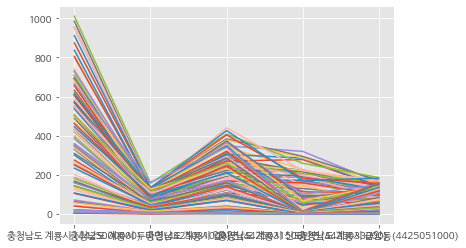

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure()
plt.plot(city_data)
plt.show()

우리가 원하는 대로 그리기 위해선 우리가 원하는 그래프의 각 요소가 어떤 값을 받으면 좋을지 생각해 보아야 합니다.  
가장 먼저 x축은 0세부터 101세 이상까지 순차적으로 배열되면 좋겠습니다.  
y축은 지금 그대로 0 ~ 1000 사이에 잡힐 숫자 데이터여야 할 것입니다.  
그리고 나서 찍히는 데이터는 각 지역별 / 나이 별 인구수가 찍히면 좋겠습니다.  


그럼 먼저 x축부터 준비해 볼까요?  
저희가 원하는 것을 위의 데이터 프레임에서 살펴보면 컬럼명이군요?
이전에 다뤘던 columns를 사용하면 될 것 같습니다.

In [ ]:
city_data.columns

Index(['2019년02월_계_0세', '2019년02월_계_1세', '2019년02월_계_2세', '2019년02월_계_3세',
       '2019년02월_계_4세', '2019년02월_계_5세', '2019년02월_계_6세', '2019년02월_계_7세',
       '2019년02월_계_8세', '2019년02월_계_9세',
       ...
       '2019년02월_계_91세', '2019년02월_계_92세', '2019년02월_계_93세', '2019년02월_계_94세',
       '2019년02월_계_95세', '2019년02월_계_96세', '2019년02월_계_97세', '2019년02월_계_98세',
       '2019년02월_계_99세', '2019년02월_계_100세 이상'],
      dtype='object', length=101)

이번에는 찍힐 데이터를 생각해 봅시다.  
각 행의 데이터를 x축에 맞추어서 찍어주면 될 것 같습니다.  
각 행의 데이터만을 추출하기 위해선 iloc[원하는 행의 인덱스] / loc[원하는 행의 이름] 형태로 불러올 수 있습니다.

---



In [ ]:
city_data.iloc[0]

2019년02월_계_0세         275
2019년02월_계_1세         301
2019년02월_계_2세         384
2019년02월_계_3세         432
2019년02월_계_4세         423
                     ... 
2019년02월_계_96세         13
2019년02월_계_97세          7
2019년02월_계_98세          4
2019년02월_계_99세          4
2019년02월_계_100세 이상      9
Name: 충청남도 계룡시 (4425000000), Length: 101, dtype: int64

In [ ]:
city_data.loc['충청남도 계룡시 (4425000000)']

2019년02월_계_0세         275
2019년02월_계_1세         301
2019년02월_계_2세         384
2019년02월_계_3세         432
2019년02월_계_4세         423
                     ... 
2019년02월_계_96세         13
2019년02월_계_97세          7
2019년02월_계_98세          4
2019년02월_계_99세          4
2019년02월_계_100세 이상      9
Name: 충청남도 계룡시 (4425000000), Length: 101, dtype: int64

동일한 데이터가 나오지만 인덱스가 더 짧군요.  
정리해보겠습니다.  
.columns는 컬럼명만 뽑아주어 x축으로 삼고, iloc를 통해 각 행의 데이터를 추출하여 y값에 넣어주었습니다.  
추가로 iloc는 index 순서 기준, loc는 인덱스명을 기준으로 행 데이터를 뽑아올 수 있으며 iloc[[인덱스1, 인덱스2...]]와 같은 형태로 여러 행을 동시에 뽑아올 수도 있습니다.  
그럼 그려볼까요?


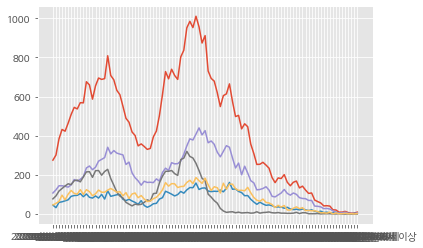

In [ ]:
# legend는 생략하였습니다.
plt.rc('font', family='NanumBarunGothic') 
plt.figure()
plt.plot(city_data.columns, city_data.iloc[0])
plt.plot(city_data.columns, city_data.iloc[1])
plt.plot(city_data.columns, city_data.iloc[2])
plt.plot(city_data.columns, city_data.iloc[3])
plt.plot(city_data.columns, city_data.iloc[4])
plt.show()

### **Unit 8. 인구 구조를 다양한 형태로 시각화하기**

unit 7 문제풀이에서 사용한 그래프를 가져와 plot 그래프를 bar그래프와 barh그래프로 그려보겠습니다.

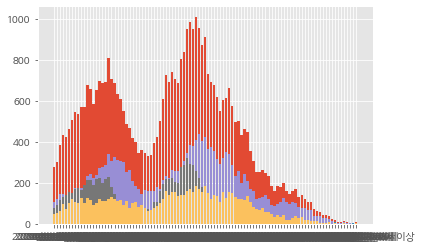

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure()
plt.bar(city_data.columns, city_data.iloc[0])
plt.bar(city_data.columns, city_data.iloc[1])
plt.bar(city_data.columns, city_data.iloc[2])
plt.bar(city_data.columns, city_data.iloc[3])
plt.bar(city_data.columns, city_data.iloc[4])
plt.show()

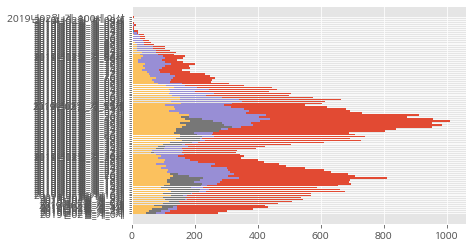

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure()
plt.barh(city_data.columns, city_data.iloc[0])
plt.barh(city_data.columns, city_data.iloc[1])
plt.barh(city_data.columns, city_data.iloc[2])
plt.barh(city_data.columns, city_data.iloc[3])
plt.barh(city_data.columns, city_data.iloc[4])
plt.show()

문제풀이

이미 앞선 unit에서 다룬 내용들에 대해선 설명을 생략하도록 하겠습니다.  
먼저 데이터를 불러오겠습니다.

In [ ]:
gender_data = pd.read_csv('gender.csv', encoding = 'cp949')
gender_data.head()

,행정구역,2019년01월_남_총인구수,2019년01월_남_연령구간인구수,2019년01월_남_0세,2019년01월_남_1세,2019년01월_남_2세,2019년01월_남_3세,2019년01월_남_4세,2019년01월_남_5세,2019년01월_남_6세,2019년01월_남_7세,2019년01월_남_8세,2019년01월_남_9세,2019년01월_남_10세,2019년01월_남_11세,2019년01월_남_12세,2019년01월_남_13세,2019년01월_남_14세,2019년01월_남_15세,2019년01월_남_16세,2019년01월_남_17세,2019년01월_남_18세,2019년01월_남_19세,2019년01월_남_20세,2019년01월_남_21세,2019년01월_남_22세,2019년01월_남_23세,2019년01월_남_24세,2019년01월_남_25세,2019년01월_남_26세,2019년01월_남_27세,2019년01월_남_28세,2019년01월_남_29세,2019년01월_남_30세,2019년01월_남_31세,2019년01월_남_32세,2019년01월_남_33세,2019년01월_남_34세,2019년01월_남_35세,2019년01월_남_36세,...,2019년01월_여_61세,2019년01월_여_62세,2019년01월_여_63세,2019년01월_여_64세,2019년01월_여_65세,2019년01월_여_66세,2019년01월_여_67세,2019년01월_여_68세,2019년01월_여_69세,2019년01월_여_70세,2019년01월_여_71세,2019년01월_여_72세,2019년01월_여_73세,2019년01월_여_74세,2019년01월_여_75세,2019년01월_여_76세,2019년01월_여_77세,2019년01월_여_78세,2019년01월_여_79세,2019년01월_여_80세,2019년01월_여_81세,2019년01월_여_82세,2019년01월_여_83세,2019년01월_여_84세,2019년01월_여_85세,2019년01월_여_86세,2019년01월_여_87세,2019년01월_여_88세,2019년01월_여_89세,2019년01월_여_90세,2019년01월_여_91세,2019년01월_여_92세,2019년01월_여_93세,2019년01월_여_94세,2019년01월_여_95세,2019년01월_여_96세,2019년01월_여_97세,2019년01월_여_98세,2019년01월_여_99세,2019년01월_여_100세 이상
0,서울특별시 (1100000000),4772822,4772822,28081,30844,34060,36368,35835,35620,39304,37620,38798,35899,38365,41378,38551,36867,40797,42745,42429,47120,55464,55163,57054,59712,63045,69051,73740,77432,81703,82173,76778,75076,74200,71709,72039,72871,72409,79624,83133,...,74631,69094,72934,63251,54523,58995,42322,45661,47360,46003,47813,40426,33032,34200,33204,38704,32565,27279,26724,24170,21746,19976,18380,15673,13268,11665,9834,8554,7633,6600,5273,3892,3069,2174,2103,1613,1115,825,607,4405
1,서울특별시 종로구 (1111000000),74700,74700,317,337,392,444,437,423,524,463,513,481,492,595,568,495,565,591,604,676,786,845,860,1012,1079,1235,1216,1350,1339,1393,1242,1161,1137,1075,989,1001,965,1097,1024,...,1115,1092,1119,990,832,915,689,754,812,777,852,710,646,676,667,756,702,556,608,521,443,413,381,330,289,232,223,186,155,142,113,86,70,53,43,46,34,20,25,158
2,서울특별시 종로구 청운효자동(1111051500),6109,6109,28,40,40,54,53,44,56,63,58,53,65,73,67,60,81,67,75,85,80,79,80,82,92,98,65,76,79,98,74,68,86,79,75,83,71,74,86,...,80,88,82,66,69,77,56,55,76,62,72,72,63,53,64,64,48,41,61,46,39,39,35,29,24,21,18,9,15,10,3,4,9,2,4,3,2,2,2,13
3,서울특별시 종로구 사직동(1111053000),4322,4322,16,31,26,34,34,40,44,34,40,38,46,40,36,28,32,30,37,25,40,54,37,54,41,44,53,56,71,69,53,65,55,71,84,46,59,62,66,...,67,68,64,61,61,60,42,48,56,44,64,41,41,42,36,47,50,36,39,36,37,31,36,31,16,15,15,14,14,10,9,3,8,2,5,6,1,3,2,14
4,서울특별시 종로구 삼청동(1111054000),1333,1333,7,5,2,10,6,4,3,6,8,14,10,16,14,11,6,13,11,14,15,16,16,17,13,16,17,17,19,18,17,22,24,14,15,22,15,17,23,...,27,21,27,30,14,28,8,14,13,18,23,21,13,17,10,21,16,17,16,15,11,12,11,10,10,6,8,5,4,4,4,2,0,2,0,1,0,0,2,7


계룡시의 데이터만 남기겠습니다.

In [ ]:
gender_data = gender_data[gender_data['행정구역'].str.contains('계룡시')]
gender_data

,행정구역,2019년01월_남_총인구수,2019년01월_남_연령구간인구수,2019년01월_남_0세,2019년01월_남_1세,2019년01월_남_2세,2019년01월_남_3세,2019년01월_남_4세,2019년01월_남_5세,2019년01월_남_6세,2019년01월_남_7세,2019년01월_남_8세,2019년01월_남_9세,2019년01월_남_10세,2019년01월_남_11세,2019년01월_남_12세,2019년01월_남_13세,2019년01월_남_14세,2019년01월_남_15세,2019년01월_남_16세,2019년01월_남_17세,2019년01월_남_18세,2019년01월_남_19세,2019년01월_남_20세,2019년01월_남_21세,2019년01월_남_22세,2019년01월_남_23세,2019년01월_남_24세,2019년01월_남_25세,2019년01월_남_26세,2019년01월_남_27세,2019년01월_남_28세,2019년01월_남_29세,2019년01월_남_30세,2019년01월_남_31세,2019년01월_남_32세,2019년01월_남_33세,2019년01월_남_34세,2019년01월_남_35세,2019년01월_남_36세,...,2019년01월_여_61세,2019년01월_여_62세,2019년01월_여_63세,2019년01월_여_64세,2019년01월_여_65세,2019년01월_여_66세,2019년01월_여_67세,2019년01월_여_68세,2019년01월_여_69세,2019년01월_여_70세,2019년01월_여_71세,2019년01월_여_72세,2019년01월_여_73세,2019년01월_여_74세,2019년01월_여_75세,2019년01월_여_76세,2019년01월_여_77세,2019년01월_여_78세,2019년01월_여_79세,2019년01월_여_80세,2019년01월_여_81세,2019년01월_여_82세,2019년01월_여_83세,2019년01월_여_84세,2019년01월_여_85세,2019년01월_여_86세,2019년01월_여_87세,2019년01월_여_88세,2019년01월_여_89세,2019년01월_여_90세,2019년01월_여_91세,2019년01월_여_92세,2019년01월_여_93세,2019년01월_여_94세,2019년01월_여_95세,2019년01월_여_96세,2019년01월_여_97세,2019년01월_여_98세,2019년01월_여_99세,2019년01월_여_100세 이상
2373,충청남도 계룡시 (4425000000),21643,21643,132,161,199,208,203,245,246,297,290,309,311,355,348,300,329,374,363,361,400,400,333,348,337,323,285,254,244,193,230,191,166,168,180,206,200,243,292,...,254,241,233,208,172,161,122,125,154,135,110,74,89,102,114,119,118,68,105,117,85,108,81,70,75,55,45,42,30,36,28,16,13,9,9,10,5,4,4,8
2374,충청남도 계룡시 두마면(4425031000),3430,3430,26,16,28,31,28,34,45,57,48,63,42,56,44,38,48,47,45,46,59,55,45,59,54,46,46,34,34,22,38,36,11,19,24,25,26,36,37,...,53,55,48,44,40,30,23,28,31,22,18,16,24,16,23,14,20,9,16,17,19,16,13,12,14,10,9,11,7,7,4,6,6,3,1,1,3,0,3,2
2375,충청남도 계룡시 엄사면(4425031500),9307,9307,59,70,69,72,71,74,81,89,85,108,106,123,132,128,126,140,155,150,174,158,163,161,173,174,140,145,119,84,102,84,74,82,84,88,78,87,119,...,126,116,133,101,81,84,61,65,77,78,57,37,48,52,65,80,76,48,69,70,51,61,54,47,50,34,29,28,17,25,17,10,5,4,7,6,1,3,1,4
2376,충청남도 계룡시 신도안면(4425033000),4539,4539,28,44,67,63,74,85,66,96,97,75,112,106,110,91,107,119,101,99,100,115,64,61,44,50,44,31,27,31,30,22,36,30,33,45,52,77,81,...,8,6,3,6,2,6,7,4,6,6,6,5,4,6,2,4,5,0,4,7,0,6,3,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0
2377,충청남도 계룡시 금암동(4425051000),4367,4367,19,31,35,42,30,52,54,55,60,63,51,70,62,43,48,68,62,66,67,72,61,67,66,53,55,44,64,56,60,49,45,37,39,48,44,43,55,...,67,64,49,57,49,41,31,28,40,29,29,16,13,28,24,21,17,11,16,23,15,25,11,10,10,10,6,3,5,4,6,0,2,1,1,3,1,1,0,2


특정 열만을 추출하는 방법입니다.  
필요할 경우 주석을 풀어 확인해주세요.  
우선 남성 데이터만 뽑아 확인하고 male 변수에 저장해두겠습니다.  
열의 인덱스를 찾아낸 것은 교재를 확인해 주세요.

In [ ]:
# 아래 코드는 모든 행 데이터를 뽑아낼 수 있습니다.
# gender_data.iloc[:]

# 특정 열만을 추출 할 수도 있는데 iloc의 경우 열의 순서에 따른 인덱스로 뽑아낼 수 있습니다.
male = gender_data.iloc[:, range(3, 104)]
# 여기에선 range함수를 통해 list를 만들어주었기에 표시되진 않았지만 많은 경우 아래와 같이 사용됩니다.
# df.iloc[:, [인덱스1, 인덱스2...]]
# df.loc[:, [행이름1, 행이름2...]]
male

,2019년01월_남_0세,2019년01월_남_1세,2019년01월_남_2세,2019년01월_남_3세,2019년01월_남_4세,2019년01월_남_5세,2019년01월_남_6세,2019년01월_남_7세,2019년01월_남_8세,2019년01월_남_9세,2019년01월_남_10세,2019년01월_남_11세,2019년01월_남_12세,2019년01월_남_13세,2019년01월_남_14세,2019년01월_남_15세,2019년01월_남_16세,2019년01월_남_17세,2019년01월_남_18세,2019년01월_남_19세,2019년01월_남_20세,2019년01월_남_21세,2019년01월_남_22세,2019년01월_남_23세,2019년01월_남_24세,2019년01월_남_25세,2019년01월_남_26세,2019년01월_남_27세,2019년01월_남_28세,2019년01월_남_29세,2019년01월_남_30세,2019년01월_남_31세,2019년01월_남_32세,2019년01월_남_33세,2019년01월_남_34세,2019년01월_남_35세,2019년01월_남_36세,2019년01월_남_37세,2019년01월_남_38세,2019년01월_남_39세,...,2019년01월_남_61세,2019년01월_남_62세,2019년01월_남_63세,2019년01월_남_64세,2019년01월_남_65세,2019년01월_남_66세,2019년01월_남_67세,2019년01월_남_68세,2019년01월_남_69세,2019년01월_남_70세,2019년01월_남_71세,2019년01월_남_72세,2019년01월_남_73세,2019년01월_남_74세,2019년01월_남_75세,2019년01월_남_76세,2019년01월_남_77세,2019년01월_남_78세,2019년01월_남_79세,2019년01월_남_80세,2019년01월_남_81세,2019년01월_남_82세,2019년01월_남_83세,2019년01월_남_84세,2019년01월_남_85세,2019년01월_남_86세,2019년01월_남_87세,2019년01월_남_88세,2019년01월_남_89세,2019년01월_남_90세,2019년01월_남_91세,2019년01월_남_92세,2019년01월_남_93세,2019년01월_남_94세,2019년01월_남_95세,2019년01월_남_96세,2019년01월_남_97세,2019년01월_남_98세,2019년01월_남_99세,2019년01월_남_100세 이상
2373,132,161,199,208,203,245,246,297,290,309,311,355,348,300,329,374,363,361,400,400,333,348,337,323,285,254,244,193,230,191,166,168,180,206,200,243,292,339,356,341,...,255,205,222,215,199,142,126,112,126,103,146,89,73,82,77,77,53,67,59,44,50,34,35,36,23,26,16,15,11,7,9,4,6,0,1,3,1,0,0,1
2374,26,16,28,31,28,34,45,57,48,63,42,56,44,38,48,47,45,46,59,55,45,59,54,46,46,34,34,22,38,36,11,19,24,25,26,36,37,53,47,47,...,64,53,45,46,35,31,29,25,22,21,34,18,15,15,11,18,14,14,6,5,6,6,5,7,4,4,3,3,1,1,1,1,1,0,1,0,0,0,0,0
2375,59,70,69,72,71,74,81,89,85,108,106,123,132,128,126,140,155,150,174,158,163,161,173,174,140,145,119,84,102,84,74,82,84,88,78,87,119,103,135,103,...,134,92,109,96,98,71,57,51,61,53,75,43,38,47,51,38,31,43,39,29,29,20,24,20,13,13,10,9,6,5,7,3,2,0,0,3,1,0,0,1
2376,28,44,67,63,74,85,66,96,97,75,112,106,110,91,107,119,101,99,100,115,64,61,44,50,44,31,27,31,30,22,36,30,33,45,52,77,81,110,108,123,...,2,0,3,4,1,1,0,0,2,3,3,3,0,1,4,0,0,2,2,1,1,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2377,19,31,35,42,30,52,54,55,60,63,51,70,62,43,48,68,62,66,67,72,61,67,66,53,55,44,64,56,60,49,45,37,39,48,44,43,55,73,66,68,...,55,60,65,69,65,39,40,36,41,26,34,25,20,19,11,21,8,8,12,9,14,8,4,9,6,8,3,3,3,1,1,0,3,0,0,0,0,0,0,0


여성의 데이터도 female 저장해두겠습니다.

In [ ]:
female = gender_data.iloc[:, range(106, 207)]
female

,2019년01월_여_0세,2019년01월_여_1세,2019년01월_여_2세,2019년01월_여_3세,2019년01월_여_4세,2019년01월_여_5세,2019년01월_여_6세,2019년01월_여_7세,2019년01월_여_8세,2019년01월_여_9세,2019년01월_여_10세,2019년01월_여_11세,2019년01월_여_12세,2019년01월_여_13세,2019년01월_여_14세,2019년01월_여_15세,2019년01월_여_16세,2019년01월_여_17세,2019년01월_여_18세,2019년01월_여_19세,2019년01월_여_20세,2019년01월_여_21세,2019년01월_여_22세,2019년01월_여_23세,2019년01월_여_24세,2019년01월_여_25세,2019년01월_여_26세,2019년01월_여_27세,2019년01월_여_28세,2019년01월_여_29세,2019년01월_여_30세,2019년01월_여_31세,2019년01월_여_32세,2019년01월_여_33세,2019년01월_여_34세,2019년01월_여_35세,2019년01월_여_36세,2019년01월_여_37세,2019년01월_여_38세,2019년01월_여_39세,...,2019년01월_여_61세,2019년01월_여_62세,2019년01월_여_63세,2019년01월_여_64세,2019년01월_여_65세,2019년01월_여_66세,2019년01월_여_67세,2019년01월_여_68세,2019년01월_여_69세,2019년01월_여_70세,2019년01월_여_71세,2019년01월_여_72세,2019년01월_여_73세,2019년01월_여_74세,2019년01월_여_75세,2019년01월_여_76세,2019년01월_여_77세,2019년01월_여_78세,2019년01월_여_79세,2019년01월_여_80세,2019년01월_여_81세,2019년01월_여_82세,2019년01월_여_83세,2019년01월_여_84세,2019년01월_여_85세,2019년01월_여_86세,2019년01월_여_87세,2019년01월_여_88세,2019년01월_여_89세,2019년01월_여_90세,2019년01월_여_91세,2019년01월_여_92세,2019년01월_여_93세,2019년01월_여_94세,2019년01월_여_95세,2019년01월_여_96세,2019년01월_여_97세,2019년01월_여_98세,2019년01월_여_99세,2019년01월_여_100세 이상
2373,146,141,192,225,217,230,270,264,259,262,258,317,309,282,315,340,317,352,404,321,349,289,288,223,227,204,176,195,142,139,186,168,160,205,229,272,341,365,356,411,...,254,241,233,208,172,161,122,125,154,135,110,74,89,102,114,119,118,68,105,117,85,108,81,70,75,55,45,42,30,36,28,16,13,9,9,10,5,4,4,8
2374,21,16,29,32,38,42,44,47,49,41,44,42,43,45,45,35,57,35,50,48,49,43,44,34,29,32,37,29,19,23,30,19,18,29,30,42,54,60,70,54,...,53,55,48,44,40,30,23,28,31,22,18,16,24,16,23,14,20,9,16,17,19,16,13,12,14,10,9,11,7,7,4,6,6,3,1,1,3,0,3,2
2375,56,44,72,72,72,61,69,90,82,77,91,107,119,98,110,143,123,142,184,138,166,149,148,122,121,116,93,93,71,57,84,87,73,86,88,88,111,111,98,167,...,126,116,133,101,81,84,61,65,77,78,57,37,48,52,65,80,76,48,69,70,51,61,54,47,50,34,29,28,17,25,17,10,5,4,7,6,1,3,1,4
2376,44,58,58,67,67,78,92,71,82,83,78,114,92,92,106,97,96,119,115,79,78,48,49,29,24,18,13,24,18,17,38,38,43,54,63,91,104,114,108,103,...,8,6,3,6,2,6,7,4,6,6,6,5,4,6,2,4,5,0,4,7,0,6,3,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0
2377,25,23,33,54,40,49,65,56,46,61,45,54,55,47,54,65,41,56,55,56,56,49,47,38,53,38,33,49,34,42,34,24,26,36,48,51,72,80,80,87,...,67,64,49,57,49,41,31,28,40,29,29,16,13,28,24,21,17,11,16,23,15,25,11,10,10,10,6,3,5,4,6,0,2,1,1,3,1,1,0,2


책에서는 여성 데이터를 음수로 변환해서 그래프를 그립니다.  
이 경우 여러가지 방법이 있지만 apply 함수를 통해 일괄적으로 적용시켜줄 수 있습니다.


In [ ]:
female.apply(lambda x: -x)

,2019년01월_여_0세,2019년01월_여_1세,2019년01월_여_2세,2019년01월_여_3세,2019년01월_여_4세,2019년01월_여_5세,2019년01월_여_6세,2019년01월_여_7세,2019년01월_여_8세,2019년01월_여_9세,2019년01월_여_10세,2019년01월_여_11세,2019년01월_여_12세,2019년01월_여_13세,2019년01월_여_14세,2019년01월_여_15세,2019년01월_여_16세,2019년01월_여_17세,2019년01월_여_18세,2019년01월_여_19세,2019년01월_여_20세,2019년01월_여_21세,2019년01월_여_22세,2019년01월_여_23세,2019년01월_여_24세,2019년01월_여_25세,2019년01월_여_26세,2019년01월_여_27세,2019년01월_여_28세,2019년01월_여_29세,2019년01월_여_30세,2019년01월_여_31세,2019년01월_여_32세,2019년01월_여_33세,2019년01월_여_34세,2019년01월_여_35세,2019년01월_여_36세,2019년01월_여_37세,2019년01월_여_38세,2019년01월_여_39세,...,2019년01월_여_61세,2019년01월_여_62세,2019년01월_여_63세,2019년01월_여_64세,2019년01월_여_65세,2019년01월_여_66세,2019년01월_여_67세,2019년01월_여_68세,2019년01월_여_69세,2019년01월_여_70세,2019년01월_여_71세,2019년01월_여_72세,2019년01월_여_73세,2019년01월_여_74세,2019년01월_여_75세,2019년01월_여_76세,2019년01월_여_77세,2019년01월_여_78세,2019년01월_여_79세,2019년01월_여_80세,2019년01월_여_81세,2019년01월_여_82세,2019년01월_여_83세,2019년01월_여_84세,2019년01월_여_85세,2019년01월_여_86세,2019년01월_여_87세,2019년01월_여_88세,2019년01월_여_89세,2019년01월_여_90세,2019년01월_여_91세,2019년01월_여_92세,2019년01월_여_93세,2019년01월_여_94세,2019년01월_여_95세,2019년01월_여_96세,2019년01월_여_97세,2019년01월_여_98세,2019년01월_여_99세,2019년01월_여_100세 이상
2373,-146,-141,-192,-225,-217,-230,-270,-264,-259,-262,-258,-317,-309,-282,-315,-340,-317,-352,-404,-321,-349,-289,-288,-223,-227,-204,-176,-195,-142,-139,-186,-168,-160,-205,-229,-272,-341,-365,-356,-411,...,-254,-241,-233,-208,-172,-161,-122,-125,-154,-135,-110,-74,-89,-102,-114,-119,-118,-68,-105,-117,-85,-108,-81,-70,-75,-55,-45,-42,-30,-36,-28,-16,-13,-9,-9,-10,-5,-4,-4,-8
2374,-21,-16,-29,-32,-38,-42,-44,-47,-49,-41,-44,-42,-43,-45,-45,-35,-57,-35,-50,-48,-49,-43,-44,-34,-29,-32,-37,-29,-19,-23,-30,-19,-18,-29,-30,-42,-54,-60,-70,-54,...,-53,-55,-48,-44,-40,-30,-23,-28,-31,-22,-18,-16,-24,-16,-23,-14,-20,-9,-16,-17,-19,-16,-13,-12,-14,-10,-9,-11,-7,-7,-4,-6,-6,-3,-1,-1,-3,0,-3,-2
2375,-56,-44,-72,-72,-72,-61,-69,-90,-82,-77,-91,-107,-119,-98,-110,-143,-123,-142,-184,-138,-166,-149,-148,-122,-121,-116,-93,-93,-71,-57,-84,-87,-73,-86,-88,-88,-111,-111,-98,-167,...,-126,-116,-133,-101,-81,-84,-61,-65,-77,-78,-57,-37,-48,-52,-65,-80,-76,-48,-69,-70,-51,-61,-54,-47,-50,-34,-29,-28,-17,-25,-17,-10,-5,-4,-7,-6,-1,-3,-1,-4
2376,-44,-58,-58,-67,-67,-78,-92,-71,-82,-83,-78,-114,-92,-92,-106,-97,-96,-119,-115,-79,-78,-48,-49,-29,-24,-18,-13,-24,-18,-17,-38,-38,-43,-54,-63,-91,-104,-114,-108,-103,...,-8,-6,-3,-6,-2,-6,-7,-4,-6,-6,-6,-5,-4,-6,-2,-4,-5,0,-4,-7,0,-6,-3,-1,-1,-1,-1,0,-1,0,-1,0,0,-1,0,0,0,0,0,0
2377,-25,-23,-33,-54,-40,-49,-65,-56,-46,-61,-45,-54,-55,-47,-54,-65,-41,-56,-55,-56,-56,-49,-47,-38,-53,-38,-33,-49,-34,-42,-34,-24,-26,-36,-48,-51,-72,-80,-80,-87,...,-67,-64,-49,-57,-49,-41,-31,-28,-40,-29,-29,-16,-13,-28,-24,-21,-17,-11,-16,-23,-15,-25,-11,-10,-10,-10,-6,-3,-5,-4,-6,0,-2,-1,-1,-3,-1,-1,0,-2


이전에도 경험하셨겠지만 pandas와 plt의 조합은 똑똑하지만 index를 잘 맞추어줘야 합니다.  
같은 index를 갖는지 확인해 보겠습니다.

In [ ]:
print(male.columns)
print(female.columns)

Index(['2019년01월_남_0세', '2019년01월_남_1세', '2019년01월_남_2세', '2019년01월_남_3세',
       '2019년01월_남_4세', '2019년01월_남_5세', '2019년01월_남_6세', '2019년01월_남_7세',
       '2019년01월_남_8세', '2019년01월_남_9세',
       ...
       '2019년01월_남_91세', '2019년01월_남_92세', '2019년01월_남_93세', '2019년01월_남_94세',
       '2019년01월_남_95세', '2019년01월_남_96세', '2019년01월_남_97세', '2019년01월_남_98세',
       '2019년01월_남_99세', '2019년01월_남_100세 이상'],
      dtype='object', length=101)
Index(['2019년01월_여_0세', '2019년01월_여_1세', '2019년01월_여_2세', '2019년01월_여_3세',
       '2019년01월_여_4세', '2019년01월_여_5세', '2019년01월_여_6세', '2019년01월_여_7세',
       '2019년01월_여_8세', '2019년01월_여_9세',
       ...
       '2019년01월_여_91세', '2019년01월_여_92세', '2019년01월_여_93세', '2019년01월_여_94세',
       '2019년01월_여_95세', '2019년01월_여_96세', '2019년01월_여_97세', '2019년01월_여_98세',
       '2019년01월_여_99세', '2019년01월_여_100세 이상'],
      dtype='object', length=101)


인덱스의 갯수는 갖지만 이름이 다르군요.  
한 번 그려보겠습니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


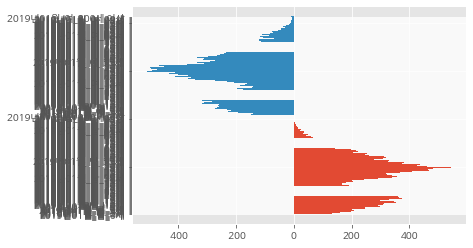

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure()
plt.barh(male.columns, male.iloc[0])
plt.barh(female.columns, female.apply(lambda x: -x).iloc[0])
plt.show()

알고 계시겠지만 데이터가 열 이름을 기준으로 찍히기 때문에 발생하는 문제입니다.  
다행히도 데이터의 갯수는 동일하기 때문에 둘 중 하나의 축을 사용하거나 동일한 이름으로 변경 후 사용하면 해결할 수 있을 것 같습니다.  
우선 남성의 컬럼명으로 그려 보겠습니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


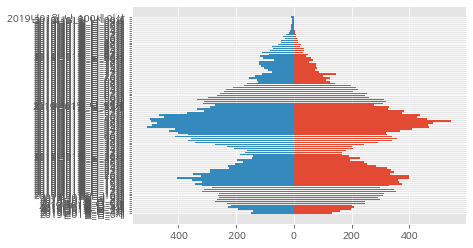

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.figure()
plt.barh(male.columns, male.iloc[0])
plt.barh(male.columns, female.apply(lambda x: -x).iloc[0])
plt.show()

저희가 원하는 대로 찍혔습니다만 잘 보이지 않아도 크게 확대하면 두 지역의 남성 인구 데이터를 비교했다고 오해할 수도 있을 것 같습니다.  
0~100까지로 변경해보겠습니다.

In [ ]:
male.columns = range(101)
female.columns = range(101)

In [ ]:
male

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
2373,132,161,199,208,203,245,246,297,290,309,311,355,348,300,329,374,363,361,400,400,333,348,337,323,285,254,244,193,230,191,166,168,180,206,200,243,292,339,356,341,...,255,205,222,215,199,142,126,112,126,103,146,89,73,82,77,77,53,67,59,44,50,34,35,36,23,26,16,15,11,7,9,4,6,0,1,3,1,0,0,1
2374,26,16,28,31,28,34,45,57,48,63,42,56,44,38,48,47,45,46,59,55,45,59,54,46,46,34,34,22,38,36,11,19,24,25,26,36,37,53,47,47,...,64,53,45,46,35,31,29,25,22,21,34,18,15,15,11,18,14,14,6,5,6,6,5,7,4,4,3,3,1,1,1,1,1,0,1,0,0,0,0,0
2375,59,70,69,72,71,74,81,89,85,108,106,123,132,128,126,140,155,150,174,158,163,161,173,174,140,145,119,84,102,84,74,82,84,88,78,87,119,103,135,103,...,134,92,109,96,98,71,57,51,61,53,75,43,38,47,51,38,31,43,39,29,29,20,24,20,13,13,10,9,6,5,7,3,2,0,0,3,1,0,0,1
2376,28,44,67,63,74,85,66,96,97,75,112,106,110,91,107,119,101,99,100,115,64,61,44,50,44,31,27,31,30,22,36,30,33,45,52,77,81,110,108,123,...,2,0,3,4,1,1,0,0,2,3,3,3,0,1,4,0,0,2,2,1,1,0,2,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2377,19,31,35,42,30,52,54,55,60,63,51,70,62,43,48,68,62,66,67,72,61,67,66,53,55,44,64,56,60,49,45,37,39,48,44,43,55,73,66,68,...,55,60,65,69,65,39,40,36,41,26,34,25,20,19,11,21,8,8,12,9,14,8,4,9,6,8,3,3,3,1,1,0,3,0,0,0,0,0,0,0


In [ ]:
female

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
2373,146,141,192,225,217,230,270,264,259,262,258,317,309,282,315,340,317,352,404,321,349,289,288,223,227,204,176,195,142,139,186,168,160,205,229,272,341,365,356,411,...,254,241,233,208,172,161,122,125,154,135,110,74,89,102,114,119,118,68,105,117,85,108,81,70,75,55,45,42,30,36,28,16,13,9,9,10,5,4,4,8
2374,21,16,29,32,38,42,44,47,49,41,44,42,43,45,45,35,57,35,50,48,49,43,44,34,29,32,37,29,19,23,30,19,18,29,30,42,54,60,70,54,...,53,55,48,44,40,30,23,28,31,22,18,16,24,16,23,14,20,9,16,17,19,16,13,12,14,10,9,11,7,7,4,6,6,3,1,1,3,0,3,2
2375,56,44,72,72,72,61,69,90,82,77,91,107,119,98,110,143,123,142,184,138,166,149,148,122,121,116,93,93,71,57,84,87,73,86,88,88,111,111,98,167,...,126,116,133,101,81,84,61,65,77,78,57,37,48,52,65,80,76,48,69,70,51,61,54,47,50,34,29,28,17,25,17,10,5,4,7,6,1,3,1,4
2376,44,58,58,67,67,78,92,71,82,83,78,114,92,92,106,97,96,119,115,79,78,48,49,29,24,18,13,24,18,17,38,38,43,54,63,91,104,114,108,103,...,8,6,3,6,2,6,7,4,6,6,6,5,4,6,2,4,5,0,4,7,0,6,3,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,0
2377,25,23,33,54,40,49,65,56,46,61,45,54,55,47,54,65,41,56,55,56,56,49,47,38,53,38,33,49,34,42,34,24,26,36,48,51,72,80,80,87,...,67,64,49,57,49,41,31,28,40,29,29,16,13,28,24,21,17,11,16,23,15,25,11,10,10,10,6,3,5,4,6,0,2,1,1,3,1,1,0,2


이것으로 그리면 될 것 같습니다.  
하지만 생각해보면 굳이 컬럼명을 바꿀 필요까지는 없습니다.  
아래와 같이 직접 축의 범위를 지정해줄 수 있기 때문이죠.  
두가지 경우를 모두 그려보겠습니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


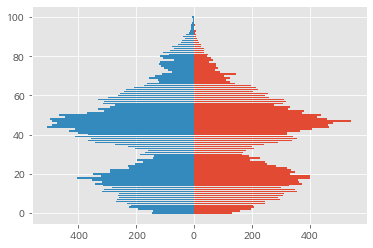

In [ ]:
plt.figure()
plt.barh(male.columns, male.iloc[0])
plt.barh(female.columns, female.apply(lambda x: -x).iloc[0])
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


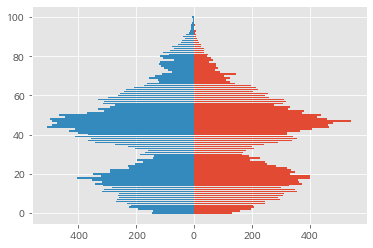

In [ ]:
plt.figure()
plt.barh(range(101), male.iloc[0])
plt.barh(range(101), female.apply(lambda x: -x).iloc[0])
plt.show()

### **Unit 9. 우리 동네 인구 구조를 파이 차트로 나타내기**

저희의 데이터에는 이미 총합이 있기지만 데이터를 합치는 방법을 살펴보겠습니다.  
sum함수는 일반적으로는 열의 합을 표시하지만 axis 변수를 통해 행의 합을 구할 수도 있습니다.

In [ ]:
male.sum(axis = 1)

2373    21643
2374     3430
2375     9307
2376     4539
2377     4367
dtype: int64

데이터를 다시 보면 첫번째 행은 다른 지역의 인구수를 합한 행입니다.  
저희는 총 합만을 필요로 하기 때문에 다음과 같이 계산해줄 수 있습니다.  
이 경우 이미 1개 행만 뽑아왔기 때문에 axis를 입력하지 않아도 됩니다.

In [ ]:
print(male.iloc[0].sum())
print(type(male.iloc[0].sum()))

21643
<class 'numpy.int64'>


남성의 데이터와 여성의 데이터를 size 변수에 집어넣어주고 그래프를 그려보겠습니다.

[21643, 21960]


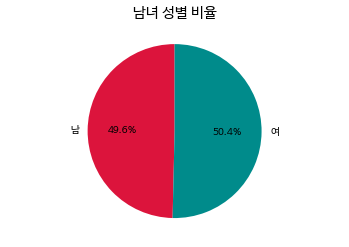

In [ ]:
size = [male.iloc[0].sum(), female.iloc[0].sum()]
print(size)

plt.rc('font', family='NanumBarunGothic') 
plt.figure()
color = ['crimson', 'darkcyan']
plt.axis('equal')
plt.pie(size,
        labels = ['남', '여'],
        autopct = '%.1f%%',
        colors = color,
        startangle = 90
        )
plt.title('남녀 성별 비율')
plt.show()

### 문제풀이

이번 데이터는 unit 8에서 그래프를 겹치기 위해 같은 컬럼명으로 변경했다는 것을 잊지 말아주세요.  
마찬가지로 축의 경우 여러분이 원하는 대로 축을 설정해서 줄 수도 있을 것입니다.

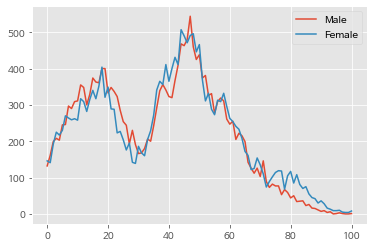

In [ ]:
plt.figure()
plt.plot(male.columns, male.iloc[0], label = 'Male')
plt.plot(male.columns, female.iloc[0], label = 'Female')
plt.legend() # 위에서 주었던 label을 표시하겠다는 뜻입니다.
plt.show()

### **Unit 10. 우리; 동네 인구 구조를 산점도로 나타내기**

다음 단계는 나이대별 남녀 숫자 차이를 그래프화해보겠습니다.  
두 데이터 프레임은 동일한 크기의 매트릭스기 때문에 계산 역시 데이터 프레임 - 데이터 프레임 꼴로 간단하게 해결할 수 있습니다.

In [ ]:
male - female

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
2373,-14,20,7,-17,-14,15,-24,33,31,47,53,38,39,18,14,34,46,9,-4,79,-16,59,49,100,58,50,68,-2,88,52,-20,0,20,1,-29,-29,-49,-26,0,-70,...,1,-36,-11,7,27,-19,4,-13,-28,-32,36,15,-16,-20,-37,-42,-65,-1,-46,-73,-35,-74,-46,-34,-52,-29,-29,-27,-19,-29,-19,-12,-7,-9,-8,-7,-4,-4,-4,-7
2374,5,0,-1,-1,-10,-8,1,10,-1,22,-2,14,1,-7,3,12,-12,11,9,7,-4,16,10,12,17,2,-3,-7,19,13,-19,0,6,-4,-4,-6,-17,-7,-23,-7,...,11,-2,-3,2,-5,1,6,-3,-9,-1,16,2,-9,-1,-12,4,-6,5,-10,-12,-13,-10,-8,-5,-10,-6,-6,-8,-6,-6,-3,-5,-5,-3,0,-1,-3,0,-3,-2
2375,3,26,-3,0,-1,13,12,-1,3,31,15,16,13,30,16,-3,32,8,-10,20,-3,12,25,52,19,29,26,-9,31,27,-10,-5,11,2,-10,-1,8,-8,37,-64,...,8,-24,-24,-5,17,-13,-4,-14,-16,-25,18,6,-10,-5,-14,-42,-45,-5,-30,-41,-22,-41,-30,-27,-37,-21,-19,-19,-11,-20,-10,-7,-3,-4,-7,-3,0,-3,-1,-3
2376,-16,-14,9,-4,7,7,-26,25,15,-8,34,-8,18,-1,1,22,5,-20,-15,36,-14,13,-5,21,20,13,14,7,12,5,-2,-8,-10,-9,-11,-14,-23,-4,0,20,...,-6,-6,0,-2,-1,-5,-7,-4,-4,-3,-3,-2,-4,-5,2,-4,-5,2,-2,-6,1,-6,-1,-1,-1,0,-1,0,0,0,-1,0,0,-1,0,0,0,0,0,0
2377,-6,8,2,-12,-10,3,-11,-1,14,2,6,16,7,-4,-6,3,21,10,12,16,5,18,19,15,2,6,31,7,26,7,11,13,13,12,-4,-8,-17,-7,-14,-19,...,-12,-4,16,12,16,-2,9,8,1,-3,5,9,7,-9,-13,0,-9,-3,-4,-14,-1,-17,-7,-1,-4,-2,-3,0,-2,-3,-5,0,1,-1,-1,-3,-1,-1,0,-2


위 데이터를 fm_gap이란 변수에 저장해 두겠습니다.

In [ ]:
fm_gap = male - female

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


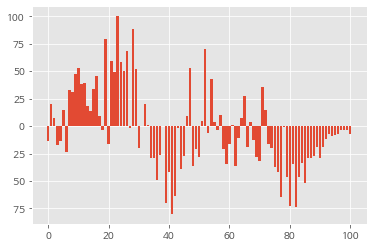

In [ ]:
plt.figure()
plt.bar(fm_gap.columns, fm_gap.iloc[0])
plt.show()

male.iloc[0].max()를 통해 최대값을 구할 수도 있습니다.  
여기에선 행을 선택 후 보여드리지만 열을 선택 후 그릴 수도 있습니다.  
최소값, 평균값 등등 다른 통계값 역시 별도의 데이터 변환 없이 함수를 수정하는 선에서 바로 확인할 수 있습니다.

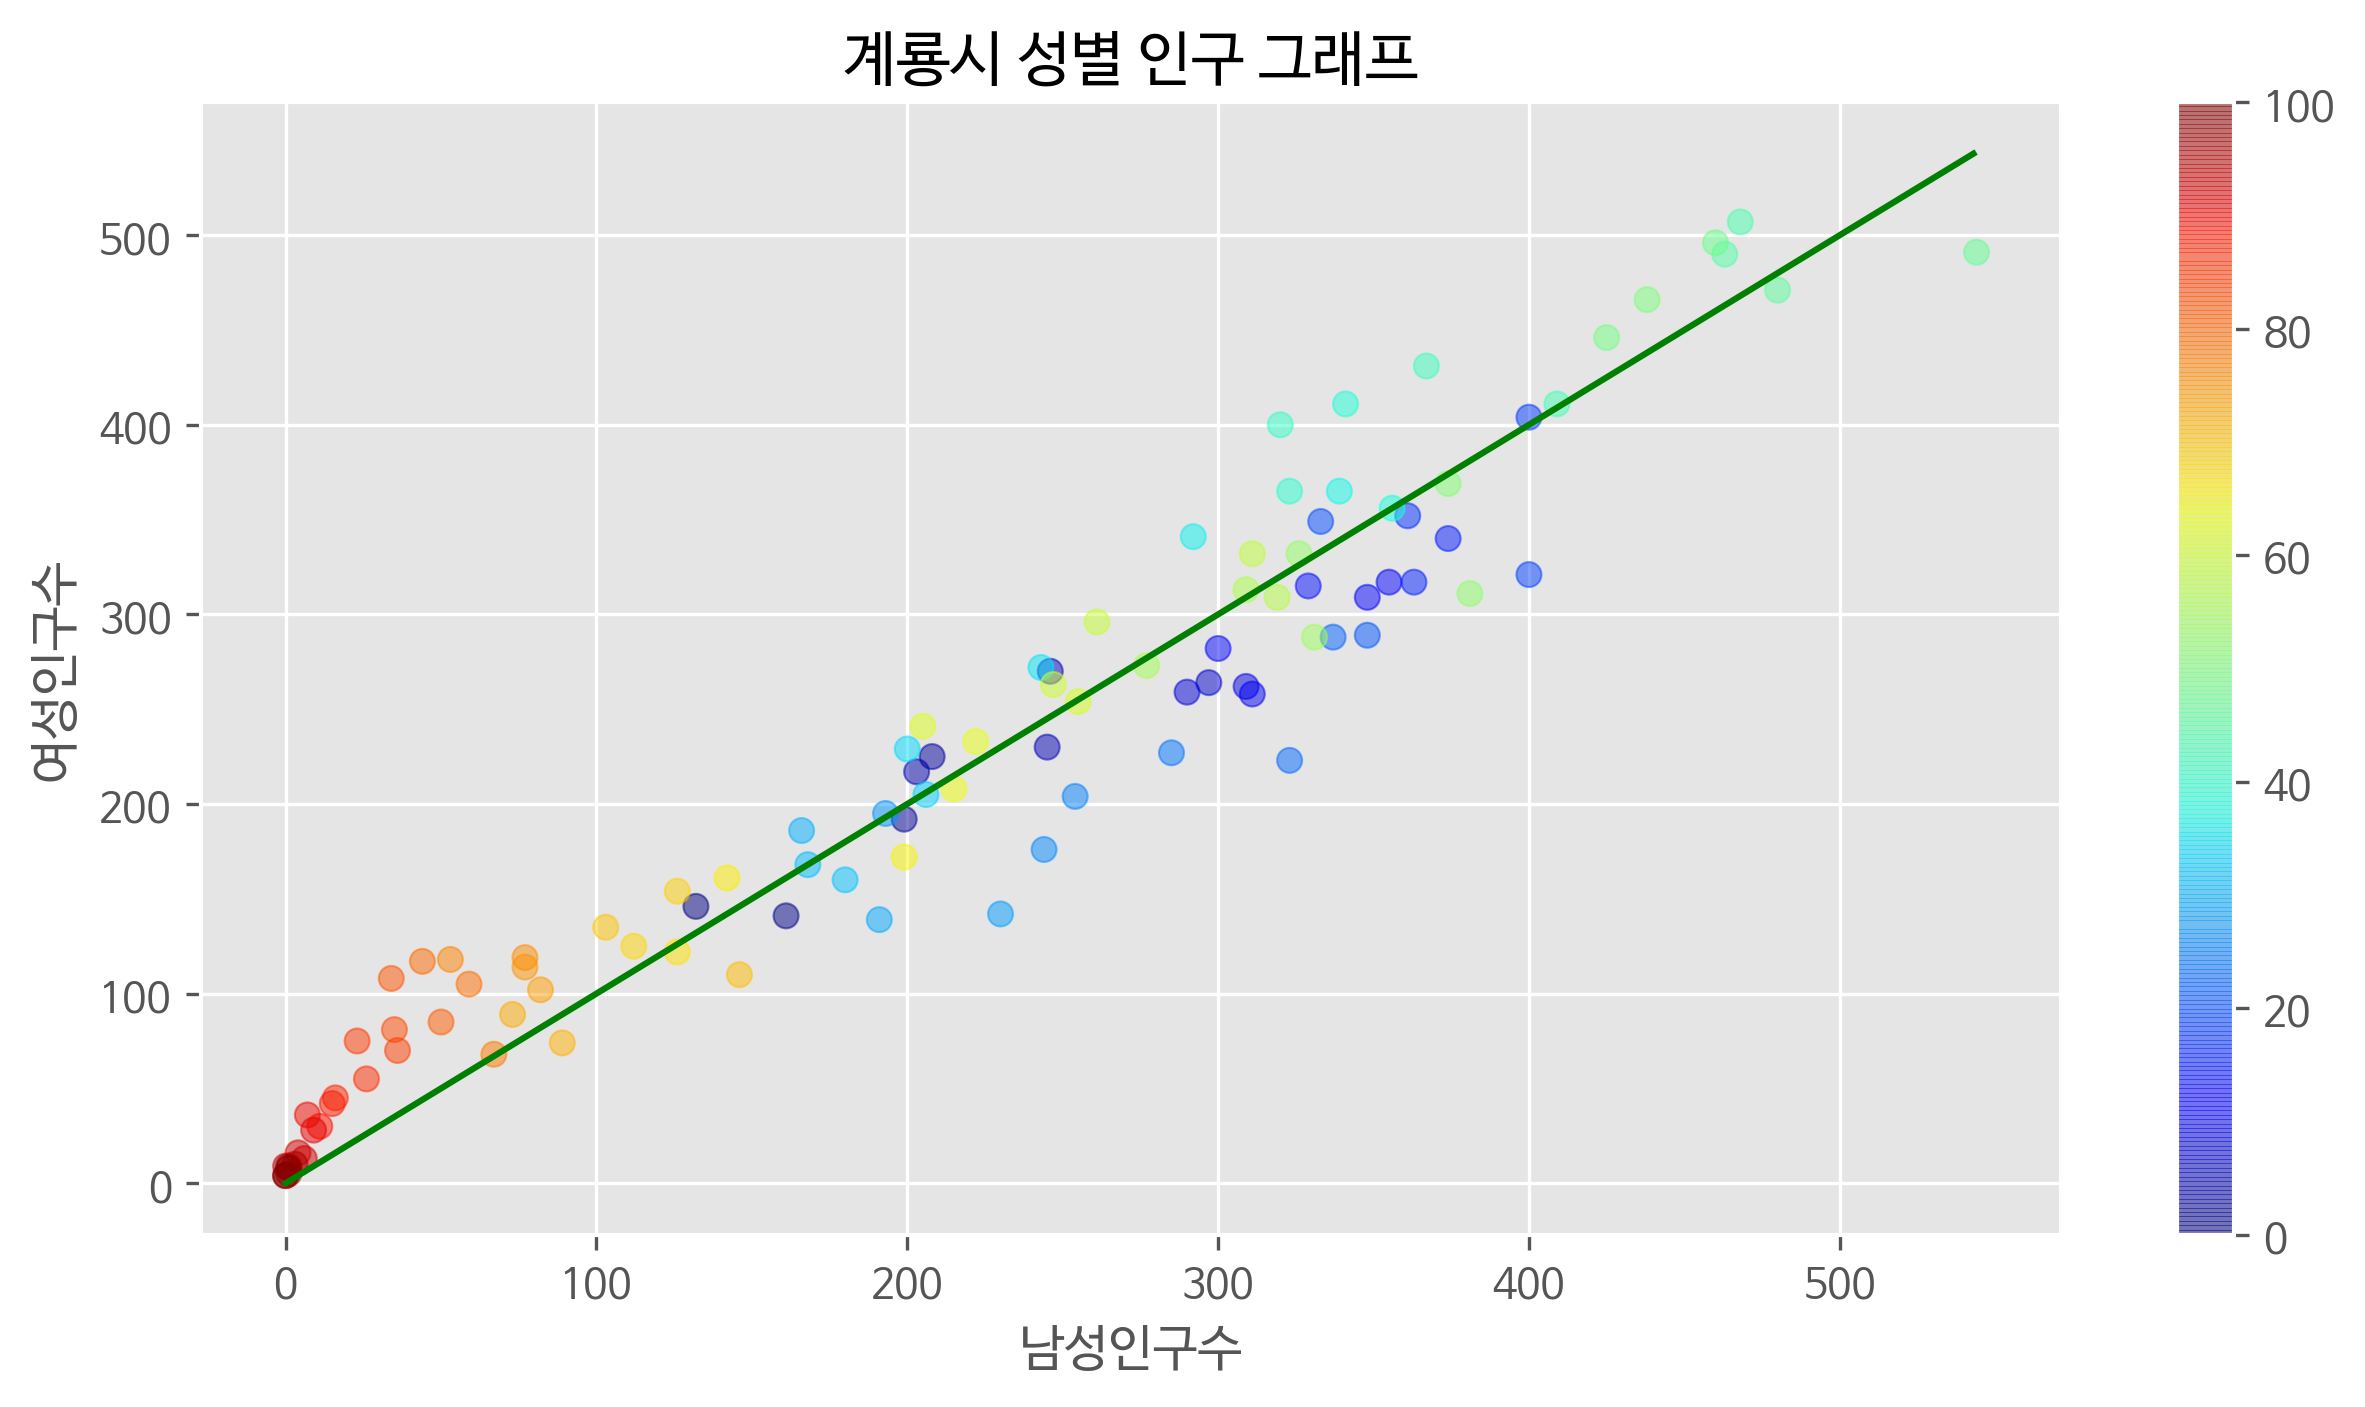

In [ ]:
plt.rc('font', family='NanumBarunGothic') 
plt.style.use('ggplot')
plt.figure(figsize = (10,5), dpi = 300)
plt.title('계룡시 성별 인구 그래프')
plt.scatter(male.iloc[0], female.iloc[0], c = male.columns, alpha = 0.5, cmap = 'jet')
plt.colorbar()
plt.plot(range(male.iloc[0].max()), range(male.iloc[0].max()), 'g')
plt.xlabel('남성인구수')
plt.ylabel('여성인구수')
plt.show()

# **넷째마당 대중교통 데이터 프로젝트**

### **Unit 11. 대중교통 데이터 시각화하기**

우선 데이터를 불러오겠습니다.

In [ ]:
subway_data = pd.read_csv('subwayfee.csv', encoding = 'cp949')
subway_data

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764
1,2019-01,1호선,151,시청,676932,676266,102388,101033
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687
...,...,...,...,...,...,...,...,...
593,2019-01,우이신설선,4709,북한산보국문,131839,117790,40396,40629
594,2019-01,우이신설선,4710,정릉,83527,73090,43457,41092
595,2019-01,우이신설선,4711,성신여대입구(돈암),77040,89799,31555,29648
596,2019-01,우이신설선,4712,보문,31502,32724,15900,16109


교재에서 구했던 유임승차 비율은 다음과 같이 간단하게 구할 수 있습니다.

In [ ]:
print(subway_data['유임승차'] / subway_data['무임승차'])
print('')
print(subway_data['유임승차'] / (subway_data['유임승차'] + subway_data['무임승차']))

0      6.856190
1      6.611439
2      7.639985
3      1.816531
4      2.075986
         ...   
593    3.263665
594    1.922061
595    2.441451
596    1.981258
597    1.956611
Length: 598, dtype: float64

0      0.872712
1      0.868619
2      0.884259
3      0.644953
4      0.674901
         ...   
593    0.765460
594    0.657776
595    0.709425
596    0.664571
597    0.661775
Length: 598, dtype: float64


교재에선 0으로 나눌 수 없다는 오류 메시지가 등장했지만 판다스의 경우 그대로 계산되어 저장됩니다.  
아래 'inf'는 계산값이 무한대, infinity라는 의미입니다.

In [ ]:
(subway_data['유임승차'] / subway_data['무임승차']).max()

inf

때문에 여기서도 두번째 계산 방식을 통해 최대값을 구해보겠습니다.

In [ ]:
(subway_data['유임승차'] / (subway_data['유임승차'] + subway_data['무임승차'])).max()

1.0

위의 정보에서는 최대 값은 구할 수 있어도 인덱스를 바로 알기 힘들 것 같습니다..  
한가지 더 과정을 거쳐주겠습니다.

In [ ]:
rate_table = pd.DataFrame(subway_data['유임승차'] / (subway_data['유임승차'] + subway_data['무임승차']), columns = ['rate'])
rate_table

,rate
0,0.872712
1,0.868619
2,0.884259
3,0.644953
4,0.674901
...,...
593,0.765460
594,0.657776
595,0.709425
596,0.664571


위에서 만든 데이터프레임을 subway_data 데이터프레임에 새로운 열로 추가한 뒤 출력해 보겠습니다.  
추가할 수 있는 함수는 여러가지가 있습니다. 여기에선 가장 기본적인 concat을 사용해 보겠습니다.  
concat은 기본적으로 밑으로 이어붙이기 때문에 이번엔 axis 파라미터를 주었습니다.

In [ ]:
added_subway = pd.concat([subway_data, rate_table], axis = 1)
added_subway

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,rate
0,2019-01,1호선,150,서울역,1516452,1400464,221180,211764,0.872712
1,2019-01,1호선,151,시청,676932,676266,102388,101033,0.868619
2,2019-01,1호선,152,종각,1240810,1177643,162410,152062,0.884259
3,2019-01,1호선,153,종로3가,703110,674148,387062,362735,0.644953
4,2019-01,1호선,154,종로5가,571824,583955,275447,263687,0.674901
...,...,...,...,...,...,...,...,...,...
593,2019-01,우이신설선,4709,북한산보국문,131839,117790,40396,40629,0.765460
594,2019-01,우이신설선,4710,정릉,83527,73090,43457,41092,0.657776
595,2019-01,우이신설선,4711,성신여대입구(돈암),77040,89799,31555,29648,0.709425
596,2019-01,우이신설선,4712,보문,31502,32724,15900,16109,0.664571


위에서 구했던 max값이 1이라는 의미는 무엇일까요?  
유임승차인원과 유임승차 + 무임승차 인원이 같다는 것은 무임 승차 인원이 없다는 의미일 것 같습니다.  
확인을 위해 승하차 인원 비율이 1인 역들의 목록을 뽑아보겠습니다.

In [ ]:
added_subway[added_subway['rate'] == added_subway['rate'].max()]

,사용월,호선명,역ID,지하철역,유임승차,유임하차,무임승차,무임하차,rate
192,2019-01,경원선,1022,창동,19,0,0,0,1.0
237,2019-01,분당선,1031,복정,25,0,0,0,1.0
266,2019-01,일산선,1949,지축,2,0,0,0,1.0
328,2019-01,경의선,1291,서울역,11,0,0,0,1.0
329,2019-01,경의선,1293,홍대입구,2,0,0,0,1.0
330,2019-01,경의선,1295,김포공항,10,0,0,0,1.0
331,2019-01,경의선,1296,계양,7,0,0,0,1.0
332,2019-01,경의선,1297,검암,5,0,0,0,1.0


이번에는 승하차 인원이 가장 많은 역을 찾도록 하겠습니다.  
이전에 보았던 행을 읽어오는 함수 loc / iloc를 이용해 여러 열을 선택하는 방법입니다.  
다만 이번에는 인덱스가 아닌 컬럼명으로 불러오는 loc를 사용해보겠습니다.

In [ ]:
added_subway.loc[:, ['유임승차', '유임하차', '무임승차', '무임하차']]

,유임승차,유임하차,무임승차,무임하차
0,1516452,1400464,221180,211764
1,676932,676266,102388,101033
2,1240810,1177643,162410,152062
3,703110,674148,387062,362735
4,571824,583955,275447,263687
...,...,...,...,...
593,131839,117790,40396,40629
594,83527,73090,43457,41092
595,77040,89799,31555,29648
596,31502,32724,15900,16109


마찬가지로 이전에 보았던 값을 더해주는 함수 sum을 통해 원하는 데이터를 뽑아보겠습니다.

In [ ]:
added_subway.loc[:, ['유임승차', '유임하차', '무임승차', '무임하차']].sum(axis = 1)

0      3349860
1      1556619
2      2732925
3      2127055
4      1694913
        ...   
593     330654
594     241166
595     228042
596      96235
597     114446
Length: 598, dtype: int64

이번에는 데이터프레임끼리 합치는 것이 아닌 데이터만 추가하는 방식으로 하겠습니다.
insert 함수는 특정 열 자리에 집어넣을 수 있습니다. '지하철역'과 '유임승차'사이에 넣어보도록 하겠습니다.


In [ ]:
added_subway.insert(4, '총이용객', added_subway.loc[:, ['유임승차', '유임하차', '무임승차', '무임하차']].sum(axis = 1))

원하는대로 추가되었는지 확인해 볼까요?

In [ ]:
added_subway

,사용월,호선명,역ID,지하철역,총이용객,유임승차,유임하차,무임승차,무임하차,rate
0,2019-01,1호선,150,서울역,3349860,1516452,1400464,221180,211764,0.872712
1,2019-01,1호선,151,시청,1556619,676932,676266,102388,101033,0.868619
2,2019-01,1호선,152,종각,2732925,1240810,1177643,162410,152062,0.884259
3,2019-01,1호선,153,종로3가,2127055,703110,674148,387062,362735,0.644953
4,2019-01,1호선,154,종로5가,1694913,571824,583955,275447,263687,0.674901
...,...,...,...,...,...,...,...,...,...,...
593,2019-01,우이신설선,4709,북한산보국문,330654,131839,117790,40396,40629,0.765460
594,2019-01,우이신설선,4710,정릉,241166,83527,73090,43457,41092,0.657776
595,2019-01,우이신설선,4711,성신여대입구(돈암),228042,77040,89799,31555,29648,0.709425
596,2019-01,우이신설선,4712,보문,96235,31502,32724,15900,16109,0.664571


사용자가 가장 많은 역은 위에서 나온 것과 동일한 방법으로 찾을 수 있습니다.

In [ ]:
added_subway[added_subway['총이용객'] == added_subway['총이용객'].max()]

,사용월,호선명,역ID,지하철역,총이용객,유임승차,유임하차,무임승차,무임하차,rate
31,2019-01,2호선,222,강남,6718007,3153418,3210437,186486,167666,0.944164


### 문제풀이

unit 11 가장 마지막 유무임승하차 비율을 역별로 파이차트로 나타내는 것은 1개만 보이고 생략하도록 하겠습니다.


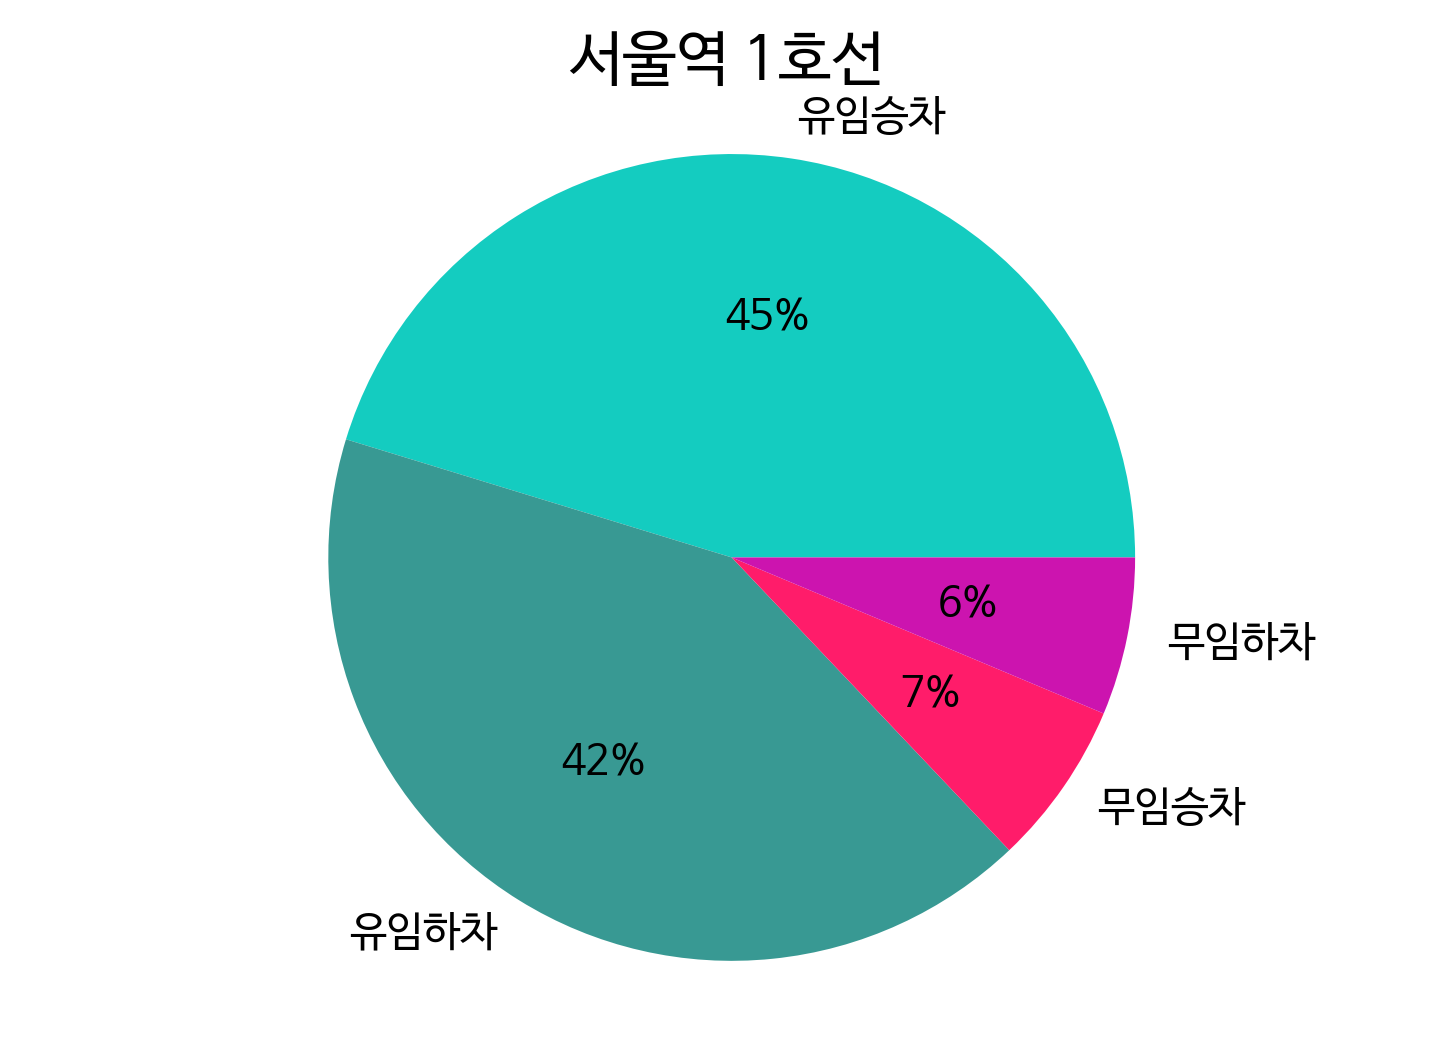

In [ ]:
sample_subway = subway_data.iloc[0]

label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

plt.rc('font', family='NanumBarunGothic') 
plt.figure(dpi = 300)
plt.title(sample_subway[3] + ' ' + sample_subway[1])
plt.pie(sample_subway[4:8], labels = label, colors = c, autopct = '%1.f%%')
plt.axis('equal')
plt.show()

### **Unit 12. 지하철 시간대별 데이터 시각화하기**

우선 데이터를 불러오겠습니다.

In [ ]:
time_data = pd.read_csv('subwaytime.csv', encoding = 'cp949')
time_data

,사용월,호선명,역ID,지하철역,04:00:00~04:59:59,Unnamed: 5,05:00:00~05:59:59,Unnamed: 7,06:00:00~06:59:59,Unnamed: 9,07:00:00~07:59:59,Unnamed: 11,08:00:00~08:59:59,Unnamed: 13,09:00:00~09:59:59,Unnamed: 15,10:00:00~10:59:59,Unnamed: 17,11:00:00~11:59:59,Unnamed: 19,12:00:00~12:59:59,Unnamed: 21,13:00:00~13:59:59,Unnamed: 23,14:00:00~14:59:59,Unnamed: 25,15:00:00~15:59:59,Unnamed: 27,16:00:00~16:59:59,Unnamed: 29,17:00:00~17:59:59,Unnamed: 31,18:00:00~18:59:59,Unnamed: 33,19:00:00~19:59:59,Unnamed: 35,20:00:00~20:59:59,Unnamed: 37,21:00:00~21:59:59,Unnamed: 39,22:00:00~22:59:59,Unnamed: 41,23:00:00~23:59:59,Unnamed: 43,00:00:00~00:59:59,Unnamed: 45,01:00:00~01:59:59,Unnamed: 47,02:00:00~02:59:59,Unnamed: 49,03:00:00~03:59:59,Unnamed: 51
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,236747,61108,163026,68446,86198,89100,80051,98021,85869,101282,91792,86627,86386,113919,87211,118223,91594,161216,98032,249973,105075,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,7703,66876,9978,209349,12818,88793,16470,49343,22512,45645,26040,41405,34728,46800,40497,40429,51586,34787,54591,29029,80258,28534,170225,28331,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,6733,104259,11028,300081,14563,167611,20165,80474,34617,76633,42088,71920,59893,75678,68149,62408,84211,57607,96197,55889,144446,63459,257735,83206,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,6066,29381,9735,84155,14261,100477,24063,87040,42723,96552,58902,101213,76615,103649,81392,88983,94128,72249,105094,61092,107194,56484,129847,62455,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503,3214,2471,0,52,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,5,3,1907,561,6026,2270,20034,3613,23966,7142,16032,5573,11575,4994,10094,4640,10578,5777,10393,6365,9038,7272,8230,8610,8499,10490,9774,12716,9285,19016,5727,18482,3596,11747,3164,10684,2412,9988,1450,6536,450,1940,0,0,0,0,0,0
595,2019-01,우이신설선,4710.0,정릉,3,0,1508,625,4799,1809,12345,2999,14421,5144,12191,4131,8907,3439,8136,3646,8205,4800,8206,5392,7235,5671,6714,7268,6693,8350,7277,9159,7603,13516,4398,12582,2767,7761,2642,6912,1778,6250,869,3595,287,1133,0,0,0,0,0,0
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),2,0,769,281,1172,931,3373,3424,6730,8021,4488,6949,4092,6527,4808,6282,6279,7306,6548,8423,6480,7993,7013,8141,7740,8293,8279,9810,9918,12496,6987,9495,6234,4863,7200,4105,6686,3293,3149,2152,648,662,0,0,0,0,0,0
597,2019-01,우이신설선,4712.0,보문,0,0,407,190,770,928,1868,2159,3949,5117,2915,3447,2689,2362,2557,2317,2992,2564,3450,2562,3149,2548,3094,2993,3181,3068,3501,3611,4602,4235,2759,3100,1930,2037,1528,2087,1351,1872,575,1179,135,456,0,1,0,0,0,0


컬럼명이 엉망으로 꼬여있습니다.  
승하차가 적힌 행을 지우고 컬럼명을 바꿔주도록 하겠습니다.  
우선 컬럼명부터 만들어두겠습니다.

In [ ]:
column_names = ['사용월', '호선명', '역ID', '지하철역']
for i in range(4, 24):
    column_names.append(str(i) + '시 승차')
    column_names.append(str(i) + '시 하차')

for i in range(0,4):
    column_names.append(str(i) + '시 승차')
    column_names.append(str(i) + '시 하차')

In [ ]:
time_data.columns = column_names
time_data

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,7시 승차,7시 하차,8시 승차,8시 하차,9시 승차,9시 하차,10시 승차,10시 하차,11시 승차,11시 하차,12시 승차,12시 하차,13시 승차,13시 하차,14시 승차,14시 하차,15시 승차,15시 하차,16시 승차,16시 하차,17시 승차,17시 하차,18시 승차,18시 하차,19시 승차,19시 하차,20시 승차,20시 하차,21시 승차,21시 하차,22시 승차,22시 하차,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
0,NaN,NaN,NaN,NaN,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차,승차,하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,236747,61108,163026,68446,86198,89100,80051,98021,85869,101282,91792,86627,86386,113919,87211,118223,91594,161216,98032,249973,105075,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,7703,66876,9978,209349,12818,88793,16470,49343,22512,45645,26040,41405,34728,46800,40497,40429,51586,34787,54591,29029,80258,28534,170225,28331,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,6733,104259,11028,300081,14563,167611,20165,80474,34617,76633,42088,71920,59893,75678,68149,62408,84211,57607,96197,55889,144446,63459,257735,83206,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,6066,29381,9735,84155,14261,100477,24063,87040,42723,96552,58902,101213,76615,103649,81392,88983,94128,72249,105094,61092,107194,56484,129847,62455,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503,3214,2471,0,52,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,5,3,1907,561,6026,2270,20034,3613,23966,7142,16032,5573,11575,4994,10094,4640,10578,5777,10393,6365,9038,7272,8230,8610,8499,10490,9774,12716,9285,19016,5727,18482,3596,11747,3164,10684,2412,9988,1450,6536,450,1940,0,0,0,0,0,0
595,2019-01,우이신설선,4710.0,정릉,3,0,1508,625,4799,1809,12345,2999,14421,5144,12191,4131,8907,3439,8136,3646,8205,4800,8206,5392,7235,5671,6714,7268,6693,8350,7277,9159,7603,13516,4398,12582,2767,7761,2642,6912,1778,6250,869,3595,287,1133,0,0,0,0,0,0
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),2,0,769,281,1172,931,3373,3424,6730,8021,4488,6949,4092,6527,4808,6282,6279,7306,6548,8423,6480,7993,7013,8141,7740,8293,8279,9810,9918,12496,6987,9495,6234,4863,7200,4105,6686,3293,3149,2152,648,662,0,0,0,0,0,0
597,2019-01,우이신설선,4712.0,보문,0,0,407,190,770,928,1868,2159,3949,5117,2915,3447,2689,2362,2557,2317,2992,2564,3450,2562,3149,2548,3094,2993,3181,3068,3501,3611,4602,4235,2759,3100,1930,2037,1528,2087,1351,1872,575,1179,135,456,0,1,0,0,0,0


이번엔 행을 삭제하겠습니다.  
행을 삭제하는 함수는 drop() 함수로 여기에서도 행의 이름과 행의 인덱스 두가지 방법을 사용할 수 있습니다.  
먼저 drop 함수에 대해서 소개하겠습니다.  
drop 함수는 입력한 행 이름을 삭제한 데이터프레임을 반환합니다.  
즉, 이것을 사용하기 위해선 다음과 같이 변수로 저장해 주어야 사용할 수 있습니다.  
df = df.drop([행이름1, 행이름2...])  
drop 함수는 위와같이 기본적으로 행을 삭제합니다만 axis = 1 파라미터를 추가하거나 columns = [컬럼명1, 컬럼명2...] 를 입력해주면 열을 삭제해줍니다.  

먼저 행 이름을 이용해 삭제해 보겠습니다.

In [ ]:
time_data = time_data.drop([0])
time_data

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,7시 승차,7시 하차,8시 승차,8시 하차,9시 승차,9시 하차,10시 승차,10시 하차,11시 승차,11시 하차,12시 승차,12시 하차,13시 승차,13시 하차,14시 승차,14시 하차,15시 승차,15시 하차,16시 승차,16시 하차,17시 승차,17시 하차,18시 승차,18시 하차,19시 승차,19시 하차,20시 승차,20시 하차,21시 승차,21시 하차,22시 승차,22시 하차,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,236747,61108,163026,68446,86198,89100,80051,98021,85869,101282,91792,86627,86386,113919,87211,118223,91594,161216,98032,249973,105075,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,7703,66876,9978,209349,12818,88793,16470,49343,22512,45645,26040,41405,34728,46800,40497,40429,51586,34787,54591,29029,80258,28534,170225,28331,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,6733,104259,11028,300081,14563,167611,20165,80474,34617,76633,42088,71920,59893,75678,68149,62408,84211,57607,96197,55889,144446,63459,257735,83206,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,6066,29381,9735,84155,14261,100477,24063,87040,42723,96552,58902,101213,76615,103649,81392,88983,94128,72249,105094,61092,107194,56484,129847,62455,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503,3214,2471,0,52,0,0,0,0
5,2019-01,1호선,154.0,종로5가,43,2,1934,3590,2935,14991,5143,40376,8509,132808,12652,78635,20434,62671,31918,69919,45533,72651,60255,69005,69651,63201,74447,54752,77646,48878,93779,42973,133826,40675,72550,24744,49690,10816,40800,7410,32727,5112,12013,3450,785,980,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,5,3,1907,561,6026,2270,20034,3613,23966,7142,16032,5573,11575,4994,10094,4640,10578,5777,10393,6365,9038,7272,8230,8610,8499,10490,9774,12716,9285,19016,5727,18482,3596,11747,3164,10684,2412,9988,1450,6536,450,1940,0,0,0,0,0,0
595,2019-01,우이신설선,4710.0,정릉,3,0,1508,625,4799,1809,12345,2999,14421,5144,12191,4131,8907,3439,8136,3646,8205,4800,8206,5392,7235,5671,6714,7268,6693,8350,7277,9159,7603,13516,4398,12582,2767,7761,2642,6912,1778,6250,869,3595,287,1133,0,0,0,0,0,0
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),2,0,769,281,1172,931,3373,3424,6730,8021,4488,6949,4092,6527,4808,6282,6279,7306,6548,8423,6480,7993,7013,8141,7740,8293,8279,9810,9918,12496,6987,9495,6234,4863,7200,4105,6686,3293,3149,2152,648,662,0,0,0,0,0,0
597,2019-01,우이신설선,4712.0,보문,0,0,407,190,770,928,1868,2159,3949,5117,2915,3447,2689,2362,2557,2317,2992,2564,3450,2562,3149,2548,3094,2993,3181,3068,3501,3611,4602,4235,2759,3100,1930,2037,1528,2087,1351,1872,575,1179,135,456,0,1,0,0,0,0


이번에는 행의 인덱스로 삭제하는 방법을 소개하겠습니다.  
이 방법은 위의 방법을 응용해 행의 인덱스를 입력해 행의 이름을 알아내고 이를 입력하는 방법입니다.  
하지만 이미 첫번째 행을 날려버린 상태이기 때문에 변수에 저장하진 않겠습니다.

In [ ]:
print(time_data.index[0])

1


위의 결과에서 볼 수 있듯 1, 서울역을 삭제하게 될것입니다.  
물론 이를 변수에 저장하진 않겠습니다.

In [ ]:
time_data.drop([time_data.index[0]])

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,7시 승차,7시 하차,8시 승차,8시 하차,9시 승차,9시 하차,10시 승차,10시 하차,11시 승차,11시 하차,12시 승차,12시 하차,13시 승차,13시 하차,14시 승차,14시 하차,15시 승차,15시 하차,16시 승차,16시 하차,17시 승차,17시 하차,18시 승차,18시 하차,19시 승차,19시 하차,20시 승차,20시 하차,21시 승차,21시 하차,22시 승차,22시 하차,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,7703,66876,9978,209349,12818,88793,16470,49343,22512,45645,26040,41405,34728,46800,40497,40429,51586,34787,54591,29029,80258,28534,170225,28331,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,6733,104259,11028,300081,14563,167611,20165,80474,34617,76633,42088,71920,59893,75678,68149,62408,84211,57607,96197,55889,144446,63459,257735,83206,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,6066,29381,9735,84155,14261,100477,24063,87040,42723,96552,58902,101213,76615,103649,81392,88983,94128,72249,105094,61092,107194,56484,129847,62455,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503,3214,2471,0,52,0,0,0,0
5,2019-01,1호선,154.0,종로5가,43,2,1934,3590,2935,14991,5143,40376,8509,132808,12652,78635,20434,62671,31918,69919,45533,72651,60255,69005,69651,63201,74447,54752,77646,48878,93779,42973,133826,40675,72550,24744,49690,10816,40800,7410,32727,5112,12013,3450,785,980,1,3,0,0,0,0
6,2019-01,1호선,155.0,동대문,621,7,15328,2164,10315,6673,14893,12227,24080,27692,23381,28386,20712,29569,22747,35954,28260,38658,31402,38011,34392,35395,34450,33461,34186,29483,34722,29805,33085,29970,22672,31274,18241,21650,16317,16942,13782,16009,7712,13475,1071,4691,3,35,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,5,3,1907,561,6026,2270,20034,3613,23966,7142,16032,5573,11575,4994,10094,4640,10578,5777,10393,6365,9038,7272,8230,8610,8499,10490,9774,12716,9285,19016,5727,18482,3596,11747,3164,10684,2412,9988,1450,6536,450,1940,0,0,0,0,0,0
595,2019-01,우이신설선,4710.0,정릉,3,0,1508,625,4799,1809,12345,2999,14421,5144,12191,4131,8907,3439,8136,3646,8205,4800,8206,5392,7235,5671,6714,7268,6693,8350,7277,9159,7603,13516,4398,12582,2767,7761,2642,6912,1778,6250,869,3595,287,1133,0,0,0,0,0,0
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),2,0,769,281,1172,931,3373,3424,6730,8021,4488,6949,4092,6527,4808,6282,6279,7306,6548,8423,6480,7993,7013,8141,7740,8293,8279,9810,9918,12496,6987,9495,6234,4863,7200,4105,6686,3293,3149,2152,648,662,0,0,0,0,0,0
597,2019-01,우이신설선,4712.0,보문,0,0,407,190,770,928,1868,2159,3949,5117,2915,3447,2689,2362,2557,2317,2992,2564,3450,2562,3149,2548,3094,2993,3181,3068,3501,3611,4602,4235,2759,3100,1930,2037,1528,2087,1351,1872,575,1179,135,456,0,1,0,0,0,0


실은 여기에서 사용할 수 있는 한가지 방법이 더 있습니다.  
바로 '사용월', '호선명', '역ID', '지하철역' 열의 데이터가 NaN이란 것을 이용해 dropna() 함수를 사용해 주는 것입니다.  
물론 아래의 경우는 이미 제거된 상태이기 때문에 별다른 변화는 없을 것입니다.

In [ ]:
time_data.dropna()

,사용월,호선명,역ID,지하철역,4시 승차,4시 하차,5시 승차,5시 하차,6시 승차,6시 하차,7시 승차,7시 하차,8시 승차,8시 하차,9시 승차,9시 하차,10시 승차,10시 하차,11시 승차,11시 하차,12시 승차,12시 하차,13시 승차,13시 하차,14시 승차,14시 하차,15시 승차,15시 하차,16시 승차,16시 하차,17시 승차,17시 하차,18시 승차,18시 하차,19시 승차,19시 하차,20시 승차,20시 하차,21시 승차,21시 하차,22시 승차,22시 하차,23시 승차,23시 하차,0시 승차,0시 하차,1시 승차,1시 하차,2시 승차,2시 하차,3시 승차,3시 하차
1,2019-01,1호선,150.0,서울역,927,22,10682,8774,13504,45545,39110,103863,80492,236747,61108,163026,68446,86198,89100,80051,98021,85869,101282,91792,86627,86386,113919,87211,118223,91594,161216,98032,249973,105075,142575,77807,97729,55056,96955,46680,70982,35481,33149,19442,3612,7167,0,410,0,0,0,0
2,2019-01,1호선,151.0,시청,74,0,2409,4049,3532,19241,7703,66876,9978,209349,12818,88793,16470,49343,22512,45645,26040,41405,34728,46800,40497,40429,51586,34787,54591,29029,80258,28534,170225,28331,76142,15634,57394,9141,58745,8204,38156,6345,14478,4079,981,1256,3,29,0,0,0,0
3,2019-01,1호선,152.0,종각,100,8,4409,5105,4593,26969,6733,104259,11028,300081,14563,167611,20165,80474,34617,76633,42088,71920,59893,75678,68149,62408,84211,57607,96197,55889,144446,63459,257735,83206,134259,51603,113555,19039,135586,12188,111743,8286,54264,5560,4886,1722,0,0,0,0,0,0
4,2019-01,1호선,153.0,종로3가,122,4,5061,2520,3876,12832,6066,29381,9735,84155,14261,100477,24063,87040,42723,96552,58902,101213,76615,103649,81392,88983,94128,72249,105094,61092,107194,56484,129847,62455,95225,37346,68613,14242,76067,10422,62004,7761,25970,5503,3214,2471,0,52,0,0,0,0
5,2019-01,1호선,154.0,종로5가,43,2,1934,3590,2935,14991,5143,40376,8509,132808,12652,78635,20434,62671,31918,69919,45533,72651,60255,69005,69651,63201,74447,54752,77646,48878,93779,42973,133826,40675,72550,24744,49690,10816,40800,7410,32727,5112,12013,3450,785,980,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,5,3,1907,561,6026,2270,20034,3613,23966,7142,16032,5573,11575,4994,10094,4640,10578,5777,10393,6365,9038,7272,8230,8610,8499,10490,9774,12716,9285,19016,5727,18482,3596,11747,3164,10684,2412,9988,1450,6536,450,1940,0,0,0,0,0,0
595,2019-01,우이신설선,4710.0,정릉,3,0,1508,625,4799,1809,12345,2999,14421,5144,12191,4131,8907,3439,8136,3646,8205,4800,8206,5392,7235,5671,6714,7268,6693,8350,7277,9159,7603,13516,4398,12582,2767,7761,2642,6912,1778,6250,869,3595,287,1133,0,0,0,0,0,0
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),2,0,769,281,1172,931,3373,3424,6730,8021,4488,6949,4092,6527,4808,6282,6279,7306,6548,8423,6480,7993,7013,8141,7740,8293,8279,9810,9918,12496,6987,9495,6234,4863,7200,4105,6686,3293,3149,2152,648,662,0,0,0,0,0,0
597,2019-01,우이신설선,4712.0,보문,0,0,407,190,770,928,1868,2159,3949,5117,2915,3447,2689,2362,2557,2317,2992,2564,3450,2562,3149,2548,3094,2993,3181,3068,3501,3611,4602,4235,2759,3100,1930,2037,1528,2087,1351,1872,575,1179,135,456,0,1,0,0,0,0


데이터를 확인하시면 시간 데이터가 오브젝트, 여기에서는 문자열로 표시되는 것을 볼 수 있습니다.  
또한 승하차 데이터 역시 오브젝트로 저장이 되어있는데 이를 int로 바꿔주겠습니다.

In [ ]:
time_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 598
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용월     598 non-null    object 
 1   호선명     598 non-null    object 
 2   역ID     598 non-null    float64
 3   지하철역    598 non-null    object 
 4   4시 승차   598 non-null    object 
 5   4시 하차   598 non-null    object 
 6   5시 승차   598 non-null    object 
 7   5시 하차   598 non-null    object 
 8   6시 승차   598 non-null    object 
 9   6시 하차   598 non-null    object 
 10  7시 승차   598 non-null    object 
 11  7시 하차   598 non-null    object 
 12  8시 승차   598 non-null    object 
 13  8시 하차   598 non-null    object 
 14  9시 승차   598 non-null    object 
 15  9시 하차   598 non-null    object 
 16  10시 승차  598 non-null    object 
 17  10시 하차  598 non-null    object 
 18  11시 승차  598 non-null    object 
 19  11시 하차  598 non-null    object 
 20  12시 승차  598 non-null    object 
 21  12시 하차  598 non-null    object 
 22  13

자료형을 int로 바꾸겠습니다.  
apply와 lambda 함수의 조합을 응용할 수도 있겠지만 데이터 타입을 바꾸는 것은 astype() 함수를 통해 간단히 적용할 수 있습니다.
원하는 열을 선택하는 것은 이전 unit을 확인해 주세요.

In [ ]:
time_data.iloc[:, range(4, 52)] = time_data.iloc[:, range(4, 52)].astype(int)
time_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 598 entries, 1 to 598
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사용월     598 non-null    object 
 1   호선명     598 non-null    object 
 2   역ID     598 non-null    float64
 3   지하철역    598 non-null    object 
 4   4시 승차   598 non-null    int64  
 5   4시 하차   598 non-null    int64  
 6   5시 승차   598 non-null    int64  
 7   5시 하차   598 non-null    int64  
 8   6시 승차   598 non-null    int64  
 9   6시 하차   598 non-null    int64  
 10  7시 승차   598 non-null    int64  
 11  7시 하차   598 non-null    int64  
 12  8시 승차   598 non-null    int64  
 13  8시 하차   598 non-null    int64  
 14  9시 승차   598 non-null    int64  
 15  9시 하차   598 non-null    int64  
 16  10시 승차  598 non-null    int64  
 17  10시 하차  598 non-null    int64  
 18  11시 승차  598 non-null    int64  
 19  11시 하차  598 non-null    int64  
 20  12시 승차  598 non-null    int64  
 21  12시 하차  598 non-null    int64  
 22  13

### 문제풀이

출근 시간대 사람들이 가장 많이 타고 내리는 역을 찾아보겠습니다.  
출근 시간대는 임의로 7시부터 9시까지로 잡겠습니다.  
먼저 해당 시간대의 데이터만 추려보겠습니다.

In [ ]:
time_data.iloc[:, range(10, 16)]

,7시 승차,7시 하차,8시 승차,8시 하차,9시 승차,9시 하차
1,39110,103863,80492,236747,61108,163026
2,7703,66876,9978,209349,12818,88793
3,6733,104259,11028,300081,14563,167611
4,6066,29381,9735,84155,14261,100477
5,5143,40376,8509,132808,12652,78635
...,...,...,...,...,...,...
594,20034,3613,23966,7142,16032,5573
595,12345,2999,14421,5144,12191,4131
596,3373,3424,6730,8021,4488,6949
597,1868,2159,3949,5117,2915,3447


아래와 같이 단순히 max 함수를 적용해 찾기에는 승차인원과 하차인원이 분리되어 있습니다.  
승하차 인원을 합산해서 포함시켜줄 필요가 있을 것 같습니다.

In [ ]:
time_data.iloc[:, range(10, 16)].max()

7시 승차    243083
7시 하차    184588
8시 승차    355172
8시 하차    449728
9시 승차    211286
9시 하차    420878
dtype: int64

rush_data라는 데이터 프레임을 만든 후 승하차 시간을 합산한 데이터를 추가해 주는 방식으로 만들어보겠습니다.

In [ ]:
rush_data = time_data.iloc[:, range(0,4)]
rush_data

,사용월,호선명,역ID,지하철역
1,2019-01,1호선,150.0,서울역
2,2019-01,1호선,151.0,시청
3,2019-01,1호선,152.0,종각
4,2019-01,1호선,153.0,종로3가
5,2019-01,1호선,154.0,종로5가
...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문
595,2019-01,우이신설선,4710.0,정릉
596,2019-01,우이신설선,4711.0,성신여대입구(돈암)
597,2019-01,우이신설선,4712.0,보문


데이터 만드는 것 자체는 어렵지 않습니다.  


In [ ]:
print(time_data.iloc[:, [10, 11]].sum(axis = 1))
print('')
print(type(time_data.iloc[:, [10, 11]].sum(axis = 1)))

1      142973
2       74579
3      110992
4       35447
5       45519
        ...  
594     23647
595     15344
596      6797
597      4027
598      5271
Length: 598, dtype: int64

<class 'pandas.core.series.Series'>


위에서 뽑아낸 데이터는 시리즈임을 알 수 있지만 concat 함수는 데이터프레임 + 데이터프레임 꼴이 아닌 데이터프레임 + 시리즈 꼴에도 다음과 같이 적용됩니다.

In [ ]:
pd.concat([rush_data, time_data.iloc[:, [10, 11]].sum(axis = 1)], axis = 1)

,사용월,호선명,역ID,지하철역,0
1,2019-01,1호선,150.0,서울역,142973
2,2019-01,1호선,151.0,시청,74579
3,2019-01,1호선,152.0,종각,110992
4,2019-01,1호선,153.0,종로3가,35447
5,2019-01,1호선,154.0,종로5가,45519
...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,23647
595,2019-01,우이신설선,4710.0,정릉,15344
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),6797
597,2019-01,우이신설선,4712.0,보문,4027


위의 방식은 코드도 길고 컬럼명을 입력하기도 불편합니다.  
때문에 시리즈 데이터를 컬럼명까지 입혀 아래와 같이 데이터프레임으로 변환한 다음 붙여주겠습니다.

In [ ]:
temp_data = pd.DataFrame(time_data.iloc[:, [10, 11]].sum(axis = 1), columns = ['7시 승하차'])
pd.concat([rush_data, temp_data], axis = 1)

,사용월,호선명,역ID,지하철역,7시 승하차
1,2019-01,1호선,150.0,서울역,142973
2,2019-01,1호선,151.0,시청,74579
3,2019-01,1호선,152.0,종각,110992
4,2019-01,1호선,153.0,종로3가,35447
5,2019-01,1호선,154.0,종로5가,45519
...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,23647
595,2019-01,우이신설선,4710.0,정릉,15344
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),6797
597,2019-01,우이신설선,4712.0,보문,4027


아래 코드는 위의 과정을 for문으로 반복시켜주는 코드입니다.

In [ ]:
n = 7
for i in range(10, 16, 2):
    columns_name = str(n) + '시 승하차'
    temp_data = pd.DataFrame(time_data.iloc[:, [i, i+1]].sum(axis = 1), columns = [columns_name])
    rush_data = pd.concat([rush_data, temp_data], axis = 1)
    n += 1

rush_data

,사용월,호선명,역ID,지하철역,7시 승하차,8시 승하차,9시 승하차
1,2019-01,1호선,150.0,서울역,142973,317239,224134
2,2019-01,1호선,151.0,시청,74579,219327,101611
3,2019-01,1호선,152.0,종각,110992,311109,182174
4,2019-01,1호선,153.0,종로3가,35447,93890,114738
5,2019-01,1호선,154.0,종로5가,45519,141317,91287
...,...,...,...,...,...,...,...
594,2019-01,우이신설선,4709.0,북한산보국문,23647,31108,21605
595,2019-01,우이신설선,4710.0,정릉,15344,19565,16322
596,2019-01,우이신설선,4711.0,성신여대입구(돈암),6797,14751,11437
597,2019-01,우이신설선,4712.0,보문,4027,9066,6362


그럼 위에서 잘 만든 데이터에서 최대값을 찾아보겠습니다.

In [ ]:
rush_data.iloc[:, [4, 5, 6]].max()

7시 승하차    277203
8시 승하차    496208
9시 승하차    489474
dtype: int64

8시 승하차 데이터가 가장 크군요.  
그럼 어느 역인지 확인해 보겠습니다.

In [ ]:
rush_data[rush_data['8시 승하차'] == rush_data.iloc[:, [4, 5, 6]].max()[1]]

,사용월,호선명,역ID,지하철역,7시 승하차,8시 승하차,9시 승하차
42,2019-01,2호선,232.0,구로디지털단지,228557,496208,314340


2호선의 구로디지털단지 역이었습니다.  
역 정보만을 뽑아내기 위해선 간단하게 아래와 같이 열을 선택해주면 됩니다.

In [ ]:
rush_data[rush_data['8시 승하차'] == rush_data.iloc[:, [4, 5, 6]].max()[1]]['지하철역']

42    구로디지털단지
Name: 지하철역, dtype: object

교재에서 나온 밤 11시에 사람들이 가장 많이 타는 역, 시간대별로 사람들이 가장 많이 타고 내리는 역, 시간대별로 하차인원이 가장 많은 역 등등은 위의 코드를 변형하면 충분히 풀 수 있기 때문에 생략하도록 하겠습니다.  
가장 마지막 문제인 지하철 시간대별 승하차 인원 추이만을 그려보도록 하겠습니다.

In [ ]:
get_on_data = time_data.iloc[:, range(4,52,2)]
get_on_data

,4시 승차,5시 승차,6시 승차,7시 승차,8시 승차,9시 승차,10시 승차,11시 승차,12시 승차,13시 승차,14시 승차,15시 승차,16시 승차,17시 승차,18시 승차,19시 승차,20시 승차,21시 승차,22시 승차,23시 승차,0시 승차,1시 승차,2시 승차,3시 승차
1,927,10682,13504,39110,80492,61108,68446,89100,98021,101282,86627,113919,118223,161216,249973,142575,97729,96955,70982,33149,3612,0,0,0
2,74,2409,3532,7703,9978,12818,16470,22512,26040,34728,40497,51586,54591,80258,170225,76142,57394,58745,38156,14478,981,3,0,0
3,100,4409,4593,6733,11028,14563,20165,34617,42088,59893,68149,84211,96197,144446,257735,134259,113555,135586,111743,54264,4886,0,0,0
4,122,5061,3876,6066,9735,14261,24063,42723,58902,76615,81392,94128,105094,107194,129847,95225,68613,76067,62004,25970,3214,0,0,0
5,43,1934,2935,5143,8509,12652,20434,31918,45533,60255,69651,74447,77646,93779,133826,72550,49690,40800,32727,12013,785,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,5,1907,6026,20034,23966,16032,11575,10094,10578,10393,9038,8230,8499,9774,9285,5727,3596,3164,2412,1450,450,0,0,0
595,3,1508,4799,12345,14421,12191,8907,8136,8205,8206,7235,6714,6693,7277,7603,4398,2767,2642,1778,869,287,0,0,0
596,2,769,1172,3373,6730,4488,4092,4808,6279,6548,6480,7013,7740,8279,9918,6987,6234,7200,6686,3149,648,0,0,0
597,0,407,770,1868,3949,2915,2689,2557,2992,3450,3149,3094,3181,3501,4602,2759,1930,1528,1351,575,135,0,0,0


In [ ]:
get_off_data = time_data.iloc[:, range(5,52,2)]
get_off_data

,4시 하차,5시 하차,6시 하차,7시 하차,8시 하차,9시 하차,10시 하차,11시 하차,12시 하차,13시 하차,14시 하차,15시 하차,16시 하차,17시 하차,18시 하차,19시 하차,20시 하차,21시 하차,22시 하차,23시 하차,0시 하차,1시 하차,2시 하차,3시 하차
1,22,8774,45545,103863,236747,163026,86198,80051,85869,91792,86386,87211,91594,98032,105075,77807,55056,46680,35481,19442,7167,410,0,0
2,0,4049,19241,66876,209349,88793,49343,45645,41405,46800,40429,34787,29029,28534,28331,15634,9141,8204,6345,4079,1256,29,0,0
3,8,5105,26969,104259,300081,167611,80474,76633,71920,75678,62408,57607,55889,63459,83206,51603,19039,12188,8286,5560,1722,0,0,0
4,4,2520,12832,29381,84155,100477,87040,96552,101213,103649,88983,72249,61092,56484,62455,37346,14242,10422,7761,5503,2471,52,0,0
5,2,3590,14991,40376,132808,78635,62671,69919,72651,69005,63201,54752,48878,42973,40675,24744,10816,7410,5112,3450,980,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,3,561,2270,3613,7142,5573,4994,4640,5777,6365,7272,8610,10490,12716,19016,18482,11747,10684,9988,6536,1940,0,0,0
595,0,625,1809,2999,5144,4131,3439,3646,4800,5392,5671,7268,8350,9159,13516,12582,7761,6912,6250,3595,1133,0,0,0
596,0,281,931,3424,8021,6949,6527,6282,7306,8423,7993,8141,8293,9810,12496,9495,4863,4105,3293,2152,662,0,0,0
597,0,190,928,2159,5117,3447,2362,2317,2564,2562,2548,2993,3068,3611,4235,3100,2037,2087,1872,1179,456,1,0,0


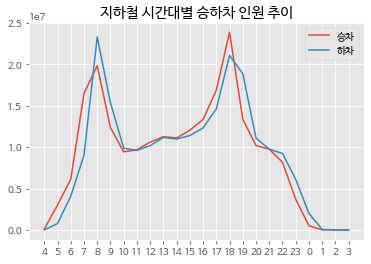

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(range(24), get_on_data.sum(), label = '승차')
plt.plot(range(24), get_off_data.sum(), label = '하차')
plt.legend()
plt.xticks(range(24), list(range(4,24)) + [0, 1, 2, 3])
plt.show()

여기까지 따라오시느라 수고 많으셨습니다.  
처음에 언급했듯 여기에서 다루었던 기법들은 전부 외울 필요는 전혀 없습니다.  
다만 이러한 기법이 있다는 정도만 기억해두면 나중에 필요할 때 검색을 통해 쉽게 찾아서 응용하실 수 있을 것입니다.

# **다섯째마당 파이썬 데이터 분석 라이브러리를 활용한 프로젝트**

### **Unit 13. 숫자 데이터를 쉽게 다루게 돕는 numpy 라이브러리**

### **Unit 14. numpy를 이용한 나만의 프로젝트 만들기**

### **Unit 15. 테이블 형태의 데이터를 쉽게 다루도록 도와주는 pnadas 라이브러리**